In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling

In [2]:
pd.set_option('display.max_columns', None)

## Задание 2

Необходимо построить модель, которая на основании данных, поступающих каждую минуту, определяют качество продукции, производимое на обжиговой машине.

In [3]:
X_data = pd.read_csv('X_data.csv', sep = ';')

In [221]:
#первую колонку нужно переименовать
X_data

Timestamp  T_data_1_1  T_data_1_2  T_data_1_3  T_data_2_1  \
0       2015-01-01 00:00:00         212         210         211         347   
1       2015-01-01 00:01:00         212         211         211         346   
2       2015-01-01 00:02:00         212         211         211         345   
3       2015-01-01 00:03:00         213         211         211         344   
4       2015-01-01 00:04:00         213         211         211         343   
...                     ...         ...         ...         ...         ...   
2103836 2018-12-31 23:56:00         271         261         265         353   
2103837 2018-12-31 23:57:00         271         261         265         353   
2103838 2018-12-31 23:58:00         271         261         265         353   
2103839 2018-12-31 23:59:00         271         261         265         353   
2103840 2019-01-01 00:00:00         271         261         265         353   

         T_data_2_2  T_data_2_3  T_data_3_1  T_data_3_2  T_data_3_3  \
0               353         347         474         473         481   
1               352         346         475         473         481   
2               352         346         476         473         481   
3               351         346         477         473         481   
4               350         346         478         473         482   
...             ...         ...         ...         ...         ...   
2103836         359         353         481         449         491   
2103837         359         353         481         449         491   
2103838         359         353         481         449         491   
2103839         359         353         481         449         491   
2103840         359         353         481         449         491   

         T_data_4_1  T_data_4_2  T_data_4_3  T_data_5_1  T_data_5_2  \
0               346         348         355         241         241   
1               349         348         355         241         241   
2               352         349         355         242         241   
3               355         349         355         242         241   
4               358         349         355         243         241   
...             ...         ...         ...         ...         ...   
2103836         325         328         328         277         276   
2103837         325         328         328         277         276   
2103838         325         328         328         277         276   
2103839         325         328         328         277         276   
2103840         325         328         328         277         276   

         T_data_5_3  H_data  AH_data        Date  Hour  
0               243  167.85     9.22  2015-01-01     0  
1               243  162.51     9.22  2015-01-01     0  
2               242  164.99     9.22  2015-01-01     0  
3               242  167.34     9.22  2015-01-01     0  
4               242  163.04     9.22  2015-01-01     0  
...             ...     ...      ...         ...   ...  
2103836         280  157.20     8.44  2018-12-31    23  
2103837         280  160.40     8.44  2018-12-31    23  
2103838         280  160.14     8.44  2018-12-31    23  
2103839         280  162.96     8.44  2018-12-31    23  
2103840         280  159.73     7.35  2019-01-01     0  

[2103841 rows x 20 columns]

In [5]:
df_train_y = pd.read_csv('Y_train.csv', sep = ';', header=None)

In [6]:
#тоже нужно переименовать
df_train_y

0    1
0      2015-01-04 00:05:00  392
1      2015-01-04 01:05:00  384
2      2015-01-04 02:05:00  393
3      2015-01-04 03:05:00  399
4      2015-01-04 04:05:00  400
...                    ...  ...
29179  2018-05-03 19:05:00  438
29180  2018-05-03 20:05:00  452
29181  2018-05-03 21:05:00  455
29182  2018-05-03 22:05:00  455
29183  2018-05-03 23:05:00  454

[29184 rows x 2 columns]

In [7]:
X_data = X_data.rename({'Unnamed: 0' : 'Timestamp'}, axis = 1)

In [8]:
X_data

Timestamp  T_data_1_1  T_data_1_2  T_data_1_3  T_data_2_1  \
0        2015-01-01 00:00:00         212         210         211         347   
1        2015-01-01 00:01:00         212         211         211         346   
2        2015-01-01 00:02:00         212         211         211         345   
3        2015-01-01 00:03:00         213         211         211         344   
4        2015-01-01 00:04:00         213         211         211         343   
...                      ...         ...         ...         ...         ...   
2103836  2018-12-31 23:56:00         271         261         265         353   
2103837  2018-12-31 23:57:00         271         261         265         353   
2103838  2018-12-31 23:58:00         271         261         265         353   
2103839  2018-12-31 23:59:00         271         261         265         353   
2103840  2019-01-01 00:00:00         271         261         265         353   

         T_data_2_2  T_data_2_3  T_data_3_1  T_data_3_2  T_data_3_3  \
0               353         347         474         473         481   
1               352         346         475         473         481   
2               352         346         476         473         481   
3               351         346         477         473         481   
4               350         346         478         473         482   
...             ...         ...         ...         ...         ...   
2103836         359         353         481         449         491   
2103837         359         353         481         449         491   
2103838         359         353         481         449         491   
2103839         359         353         481         449         491   
2103840         359         353         481         449         491   

         T_data_4_1  T_data_4_2  T_data_4_3  T_data_5_1  T_data_5_2  \
0               346         348         355         241         241   
1               349         348         355         241         241   
2               352         349         355         242         241   
3               355         349         355         242         241   
4               358         349         355         243         241   
...             ...         ...         ...         ...         ...   
2103836         325         328         328         277         276   
2103837         325         328         328         277         276   
2103838         325         328         328         277         276   
2103839         325         328         328         277         276   
2103840         325         328         328         277         276   

         T_data_5_3  H_data  AH_data  
0               243  167.85     9.22  
1               243  162.51     9.22  
2               242  164.99     9.22  
3               242  167.34     9.22  
4               242  163.04     9.22  
...             ...     ...      ...  
2103836         280  157.20     8.44  
2103837         280  160.40     8.44  
2103838         280  160.14     8.44  
2103839         280  162.96     8.44  
2103840         280  159.73     7.35  

[2103841 rows x 18 columns]

In [9]:
df_train_y = df_train_y.rename({0: 'Timestamp', 1 : 'Quality'}, axis = 1)

In [10]:
df_train_y

Timestamp  Quality
0      2015-01-04 00:05:00      392
1      2015-01-04 01:05:00      384
2      2015-01-04 02:05:00      393
3      2015-01-04 03:05:00      399
4      2015-01-04 04:05:00      400
...                    ...      ...
29179  2018-05-03 19:05:00      438
29180  2018-05-03 20:05:00      452
29181  2018-05-03 21:05:00      455
29182  2018-05-03 22:05:00      455
29183  2018-05-03 23:05:00      454

[29184 rows x 2 columns]

In [11]:
df_train_y.Timestamp = pd.to_datetime(df_train_y.Timestamp)

Можно ли сразу увидеть какой-то тренд в значениях качества ?

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


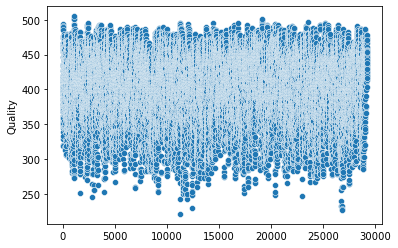

In [12]:
sns.scatterplot(df_train_y.index, df_train_y.Quality);

Не похоже, что есть очевидный тренд - график напоминает стационарный временной ряд

In [218]:
y_submit = pd.read_csv('Y_submit.csv', header = None)

Формат отправки нужно будет немного изменить, чтобы с ним было удобнее взаимодействовать

In [219]:
y_submit

0
0     2018-05-04 00:05:00;420
1     2018-05-04 01:05:00;420
2     2018-05-04 02:05:00;420
3     2018-05-04 03:05:00;420
4     2018-05-04 04:05:00;420
...                       ...
5803  2018-12-31 19:05:00;420
5804  2018-12-31 20:05:00;420
5805  2018-12-31 21:05:00;420
5806  2018-12-31 22:05:00;420
5807  2018-12-31 23:05:00;420

[5808 rows x 1 columns]

In [198]:
y_submit[['Timestamp', 'Quality']] = y_submit[0].str.split(';', 1, expand=True)
y_submit = y_submit.drop(0, axis = 1)
y_submit

Timestamp Quality
0     2018-05-04 00:05:00     420
1     2018-05-04 01:05:00     420
2     2018-05-04 02:05:00     420
3     2018-05-04 03:05:00     420
4     2018-05-04 04:05:00     420
...                   ...     ...
5803  2018-12-31 19:05:00     420
5804  2018-12-31 20:05:00     420
5805  2018-12-31 21:05:00     420
5806  2018-12-31 22:05:00     420
5807  2018-12-31 23:05:00     420

[5808 rows x 2 columns]

Нужно соединить обучающие признаки и целевую переменную для дальнейшего обучения

In [18]:
X_data.Timestamp = pd.to_datetime(X_data.Timestamp)
df_train_y.Timestamp = pd.to_datetime(df_train_y.Timestamp)

In [19]:
df_prox_full = pd.merge(X_data, df_train_y, on = 'Timestamp')

In [20]:
df_prox_full.sort_values(by = 'Timestamp')

Timestamp  T_data_1_1  T_data_1_2  T_data_1_3  T_data_2_1  \
0     2015-01-04 00:05:00         277         326         273         322   
1     2015-01-04 01:05:00         277         253         272         320   
2     2015-01-04 02:05:00         262         218         260         326   
3     2015-01-04 03:05:00         243         238         252         327   
4     2015-01-04 04:05:00         236         238         245         323   
...                   ...         ...         ...         ...         ...   
29179 2018-05-03 19:05:00         257         258         266         379   
29180 2018-05-03 20:05:00         259         255         260         372   
29181 2018-05-03 21:05:00         260         254         263         364   
29182 2018-05-03 22:05:00         255         255         260         356   
29183 2018-05-03 23:05:00         254         257         256         349   

       T_data_2_2  T_data_2_3  T_data_3_1  T_data_3_2  T_data_3_3  T_data_4_1  \
0             335         352         505         501         670         326   
1             333         355         500         501         687         337   
2             336         330         505         499         443         347   
3             329         308         520         498         540         342   
4             320         318         522         501         524         343   
...           ...         ...         ...         ...         ...         ...   
29179         381         358         449         386         461         354   
29180         367         362         431         461         453         360   
29181         349         352         429         425         446         348   
29182         352         354         438         468         441         347   
29183         350         355         451         454         439         347   

       T_data_4_2  T_data_4_3  T_data_5_1  T_data_5_2  T_data_5_3  H_data  \
0             379         337         231         236         242  153.77   
1             396         335         234         242         230  158.27   
2             399         332         243         251         240  153.36   
3             387         334         257         258         246  153.21   
4             371         344         264         263         265  195.71   
...           ...         ...         ...         ...         ...     ...   
29179         350         349         234         254         252  157.47   
29180         344         348         235         253         247  157.17   
29181         360         345         256         257         247  155.00   
29182         357         344         254         265         248  153.89   
29183         342         331         255         266         245  157.46   

       AH_data  Quality  
0         7.90      392  
1         6.96      384  
2         7.29      393  
3         7.11      399  
4         7.97      400  
...        ...      ...  
29179     7.33      438  
29180     7.87      452  
29181     7.65      455  
29182     8.90      455  
29183     6.39      454  

[29184 rows x 19 columns]

In [21]:
df_prox_full.Timestamp.max()

Timestamp('2018-05-03 23:05:00')

Соединение выше неправильное - теряем много информации \
Нужно взять какие-то статистики за каждый час, потом соединять \
Для соединения нужно извлечь ключ - в данном случае это будет дата + час

In [23]:
df_train_y_hourdate = df_train_y
df_train_y_hourdate['Date'] = df_train_y.Timestamp.dt.date
df_train_y_hourdate['Hour'] = df_train_y.Timestamp.dt.hour
df_train_y_hourdate = df_train_y_hourdate.drop('Timestamp', axis = 1)

In [24]:
df_train_y_hourdate

Quality        Date  Hour
0          392  2015-01-04     0
1          384  2015-01-04     1
2          393  2015-01-04     2
3          399  2015-01-04     3
4          400  2015-01-04     4
...        ...         ...   ...
29179      438  2018-05-03    19
29180      452  2018-05-03    20
29181      455  2018-05-03    21
29182      455  2018-05-03    22
29183      454  2018-05-03    23

[29184 rows x 3 columns]

In [25]:
X_data.Timestamp = pd.to_datetime(X_data.Timestamp)

In [26]:
X_data_hourdate = X_data
X_data_hourdate['Date'] = X_data_hourdate.Timestamp.dt.date
X_data_hourdate['Hour'] = X_data_hourdate.Timestamp.dt.hour
X_data_hourdate = X_data_hourdate.drop('Timestamp', axis = 1)

In [27]:
merged_xy = pd.merge(X_data_hourdate,df_train_y_hourdate, on = ['Date', 'Hour'], how = 'left')

In [28]:
merged_xy.shape

(2103841, 20)

Часть данных потеряем ввиду пропущенных значений качества для 17% обучающего датасета \
Но кажется, что общее число строк все еще достаточно велико

In [29]:
merged_xy.Quality.isna().sum() / len(merged_xy.Quality)

0.16769375632474126

In [30]:
merged_xy = merged_xy[~merged_xy['Quality'].isna()]

In [32]:
merged_xy = merged_xy.reset_index(drop = True)
merged_xy = merged_xy.drop(['Date', 'Hour'], axis = 1)
merged_xy

T_data_1_1  T_data_1_2  T_data_1_3  T_data_2_1  T_data_2_2  \
0               276         330         272         323         335   
1               276         329         272         322         335   
2               276         328         272         322         335   
3               276         328         273         322         335   
4               277         327         273         322         335   
...             ...         ...         ...         ...         ...   
1751035         258         260         258         347         300   
1751036         258         260         258         347         299   
1751037         258         260         258         347         300   
1751038         258         260         258         347         301   
1751039         258         260         257         347         304   

         T_data_2_3  T_data_3_1  T_data_3_2  T_data_3_3  T_data_4_1  \
0               351         505         501         655         325   
1               351         505         501         658         325   
2               351         505         501         661         325   
3               351         505         501         664         326   
4               352         505         501         667         326   
...             ...         ...         ...         ...         ...   
1751035         351         472         436         442         339   
1751036         351         472         436         442         339   
1751037         352         472         436         442         338   
1751038         352         473         435         442         338   
1751039         352         473         435         442         338   

         T_data_4_2  T_data_4_3  T_data_5_1  T_data_5_2  T_data_5_3  H_data  \
0               377         337         231         236         243  157.74   
1               377         337         231         236         243  152.62   
2               377         337         231         236         243  158.29   
3               378         337         231         236         242  154.12   
4               378         337         231         236         242  155.45   
...             ...         ...         ...         ...         ...     ...   
1751035         324         482         249         251         238  158.94   
1751036         323         487         249         251         238  154.50   
1751037         323         492         249         250         238  153.31   
1751038         323         497         249         250         238  156.62   
1751039         322         501         249         249         237  157.46   

         AH_data  Quality  
0           7.90    392.0  
1           7.90    392.0  
2           7.90    392.0  
3           7.90    392.0  
4           7.90    392.0  
...          ...      ...  
1751035     6.39    454.0  
1751036     6.39    454.0  
1751037     6.39    454.0  
1751038     6.39    454.0  
1751039     6.39    454.0  

[1751040 rows x 18 columns]

In [33]:
from catboost import CatBoostRegressor, Pool, cv
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

#### Сгруппирую исходный датафрейм, усреднив все показатели в интервале одного часа

In [34]:
X_data

Timestamp  T_data_1_1  T_data_1_2  T_data_1_3  T_data_2_1  \
0       2015-01-01 00:00:00         212         210         211         347   
1       2015-01-01 00:01:00         212         211         211         346   
2       2015-01-01 00:02:00         212         211         211         345   
3       2015-01-01 00:03:00         213         211         211         344   
4       2015-01-01 00:04:00         213         211         211         343   
...                     ...         ...         ...         ...         ...   
2103836 2018-12-31 23:56:00         271         261         265         353   
2103837 2018-12-31 23:57:00         271         261         265         353   
2103838 2018-12-31 23:58:00         271         261         265         353   
2103839 2018-12-31 23:59:00         271         261         265         353   
2103840 2019-01-01 00:00:00         271         261         265         353   

         T_data_2_2  T_data_2_3  T_data_3_1  T_data_3_2  T_data_3_3  \
0               353         347         474         473         481   
1               352         346         475         473         481   
2               352         346         476         473         481   
3               351         346         477         473         481   
4               350         346         478         473         482   
...             ...         ...         ...         ...         ...   
2103836         359         353         481         449         491   
2103837         359         353         481         449         491   
2103838         359         353         481         449         491   
2103839         359         353         481         449         491   
2103840         359         353         481         449         491   

         T_data_4_1  T_data_4_2  T_data_4_3  T_data_5_1  T_data_5_2  \
0               346         348         355         241         241   
1               349         348         355         241         241   
2               352         349         355         242         241   
3               355         349         355         242         241   
4               358         349         355         243         241   
...             ...         ...         ...         ...         ...   
2103836         325         328         328         277         276   
2103837         325         328         328         277         276   
2103838         325         328         328         277         276   
2103839         325         328         328         277         276   
2103840         325         328         328         277         276   

         T_data_5_3  H_data  AH_data        Date  Hour  
0               243  167.85     9.22  2015-01-01     0  
1               243  162.51     9.22  2015-01-01     0  
2               242  164.99     9.22  2015-01-01     0  
3               242  167.34     9.22  2015-01-01     0  
4               242  163.04     9.22  2015-01-01     0  
...             ...     ...      ...         ...   ...  
2103836         280  157.20     8.44  2018-12-31    23  
2103837         280  160.40     8.44  2018-12-31    23  
2103838         280  160.14     8.44  2018-12-31    23  
2103839         280  162.96     8.44  2018-12-31    23  
2103840         280  159.73     7.35  2019-01-01     0  

[2103841 rows x 20 columns]

In [35]:
X_data.Timestamp = pd.to_datetime(X_data.Timestamp)
df_prox = X_data.set_index('Timestamp')

#усредним все значения датчиков/высоты и влажности за каждый час

df_prox = df_prox.resample('1H').mean()
df_prox = df_prox.reset_index()
df_prox

Timestamp  T_data_1_1  T_data_1_2  T_data_1_3  T_data_2_1  \
0     2015-01-01 00:00:00  213.200000  213.566667  211.083333  320.850000   
1     2015-01-01 01:00:00  209.683333  204.683333  212.550000  289.533333   
2     2015-01-01 02:00:00  230.966667  191.100000  209.833333  291.166667   
3     2015-01-01 03:00:00  227.666667  221.666667  222.716667  325.783333   
4     2015-01-01 04:00:00  235.766667  239.816667  250.066667  346.933333   
...                   ...         ...         ...         ...         ...   
35060 2018-12-31 20:00:00  251.633333  264.766667  255.783333  378.866667   
35061 2018-12-31 21:00:00  302.150000  283.566667  255.316667  359.066667   
35062 2018-12-31 22:00:00  293.983333  273.033333  259.000000  355.266667   
35063 2018-12-31 23:00:00  271.000000  243.316667  264.533333  355.550000   
35064 2019-01-01 00:00:00  271.000000  261.000000  265.000000  353.000000   

       T_data_2_2  T_data_2_3  T_data_3_1  T_data_3_2  T_data_3_3  T_data_4_1  \
0      329.383333  344.283333  501.516667  473.000000  486.100000  367.400000   
1      270.583333  354.866667  528.633333  475.500000  490.866667  345.333333   
2      311.916667  342.050000  510.500000  489.450000  486.616667  358.633333   
3      153.416667  343.650000  456.733333  473.516667  481.183333  337.816667   
4      256.116667  345.766667  424.366667  480.950000  483.733333  336.000000   
...           ...         ...         ...         ...         ...         ...   
35060  367.866667  379.233333  474.083333  449.000000  467.533333  330.733333   
35061  354.583333  353.566667  481.033333  449.000000  492.000000  325.650000   
35062  355.250000  355.483333  481.000000  449.000000  492.533333  325.000000   
35063  359.000000  356.500000  481.000000  449.000000  491.000000  325.000000   
35064  359.000000  353.000000  481.000000  449.000000  491.000000  325.000000   

       T_data_4_2  T_data_4_3  T_data_5_1  T_data_5_2  T_data_5_3      H_data  \
0      353.350000  350.066667  246.666667  240.966667  239.800000  165.278333   
1      354.800000  343.583333  237.683333  239.100000  237.600000  164.746667   
2      345.116667  343.550000  237.850000  231.833333  238.816667  165.085833   
3      353.516667  349.916667  235.750000  239.933333  236.750000  165.422833   
4      354.833333  354.633333  240.100000  241.800000  238.966667  165.061500   
...           ...         ...         ...         ...         ...         ...   
35060  322.183333  323.433333  277.000000  281.366667  276.066667  186.105167   
35061  323.933333  326.250000  277.000000  279.016667  279.383333  163.874333   
35062  329.450000  326.566667  277.000000  276.216667  280.000000  159.678500   
35063  331.300000  328.000000  277.000000  276.000000  280.000000  159.759000   
35064  328.000000  328.000000  277.000000  276.000000  280.000000  159.730000   

       AH_data  Hour  
0         9.22   0.0  
1         7.82   1.0  
2         6.03   2.0  
3         8.36   3.0  
4         7.02   4.0  
...        ...   ...  
35060     6.38  20.0  
35061     8.37  21.0  
35062     6.13  22.0  
35063     8.44  23.0  
35064     7.35   0.0  

[35065 rows x 19 columns]

In [36]:
df_prox['Date'] = df_prox.Timestamp.dt.date
df_prox['Hour'] = df_prox.Timestamp.dt.hour
# df_prox = df_prox.drop('Timestamp', axis = 1)
df_prox

In [38]:
merged_xy_hourly = pd.merge(df_prox,df_train_y_hourdate, on = ['Date', 'Hour'], how = 'left')

In [40]:
merged_xy_hourly = merged_xy_hourly[~merged_xy_hourly['Quality'].isna()]

In [39]:
merged_xy_hourly.isna().sum()

Timestamp        0
T_data_1_1       0
T_data_1_2       0
T_data_1_3       0
T_data_2_1       0
T_data_2_2       0
T_data_2_3       0
T_data_3_1       0
T_data_3_2       0
T_data_3_3       0
T_data_4_1       0
T_data_4_2       0
T_data_4_3       0
T_data_5_1       0
T_data_5_2       0
T_data_5_3       0
H_data           0
AH_data          0
Hour             0
Date             0
Quality       5881
dtype: int64

In [222]:
merged_xy_hourly.Quality.isna().sum() / len(merged_xy_hourly.Quality)
#sanity-check : получаем те же 17%

0.0

In [42]:
merged_xy_hourly = merged_xy_hourly[~merged_xy_hourly['Quality'].isna()]
merged_xy_hourly = merged_xy_hourly.drop(['Hour', 'Date'], axis = 1)

In [43]:
X = merged_xy_hourly.drop('Quality', axis = 1)
y = merged_xy_hourly.Quality

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
train_pool = Pool(X_train, y_train)
test_pool = Pool(X_test, y_test)

Первая модель для обучения на датасете со средними значениями за час

Взял градиентный бустинг в реализации catboost - показалось, что удобный бейзлайн, не требующий предобработки численных признаков

In [45]:
first_model = CatBoostRegressor()

In [46]:
first_model.fit(train_pool)

Learning rate set to 0.066258
0:	learn: 44.0337957	total: 169ms	remaining: 2m 48s
1:	learn: 41.9561339	total: 178ms	remaining: 1m 28s
2:	learn: 40.0608355	total: 187ms	remaining: 1m 2s
3:	learn: 38.2787359	total: 197ms	remaining: 49s
4:	learn: 36.6748832	total: 204ms	remaining: 40.5s
5:	learn: 35.1310182	total: 210ms	remaining: 34.7s
6:	learn: 33.6838027	total: 215ms	remaining: 30.4s
7:	learn: 32.3503556	total: 219ms	remaining: 27.2s
8:	learn: 31.1350476	total: 223ms	remaining: 24.6s
9:	learn: 30.0206513	total: 228ms	remaining: 22.6s
10:	learn: 28.9449248	total: 233ms	remaining: 20.9s
11:	learn: 28.0022596	total: 237ms	remaining: 19.5s
12:	learn: 27.0914116	total: 242ms	remaining: 18.3s
13:	learn: 26.2586264	total: 246ms	remaining: 17.3s
14:	learn: 25.5128021	total: 250ms	remaining: 16.4s
15:	learn: 24.8045042	total: 254ms	remaining: 15.6s
16:	learn: 24.1286699	total: 258ms	remaining: 14.9s
17:	learn: 23.5270786	total: 262ms	remaining: 14.3s
18:	learn: 22.9624041	total: 266ms	remaining

In [47]:
df_train_y.Quality.describe()

count    29184.000000
mean       402.800747
std         46.273228
min        221.000000
25%        372.000000
50%        408.000000
75%        439.000000
max        505.000000
Name: Quality, dtype: float64

In [48]:
first_preds = first_model.predict(X_test)

In [49]:
mean_absolute_error(first_preds, y_test)
#ошибка модели меньше стандартного отклонения 

10.907557599226779

In [50]:
first_model.get_feature_importance(prettified = True)

Feature Id  Importances
0   T_data_3_3    21.678880
1   T_data_3_1    21.421206
2   T_data_3_2    19.235245
3       H_data     6.558947
4   T_data_5_3     5.240532
5   T_data_5_2     4.336993
6   T_data_5_1     3.790001
7   T_data_1_1     2.978898
8   T_data_1_2     2.925818
9   T_data_1_3     2.847484
10  T_data_2_2     1.956476
11  T_data_2_3     1.719972
12  T_data_2_1     1.684303
13   Timestamp     1.091850
14  T_data_4_1     0.714738
15  T_data_4_3     0.695827
16  T_data_4_2     0.620527
17     AH_data     0.502302

### Теперь попробуем то же самое для модели, учитывающей год, месяц, день, час 
Спойлер: качество почти не изменилось

In [51]:
df_prox['Year'] = df_prox.Timestamp.dt.year
df_prox['Month'] = df_prox.Timestamp.dt.month
df_prox['Day'] = df_prox.Timestamp.dt.day
df_prox['dayofweek_num']=df_prox['Timestamp'].dt.dayofweek  

In [53]:
df_prox

Timestamp  T_data_1_1  T_data_1_2  T_data_1_3  T_data_2_1  \
0     2015-01-01 00:00:00  213.200000  213.566667  211.083333  320.850000   
1     2015-01-01 01:00:00  209.683333  204.683333  212.550000  289.533333   
2     2015-01-01 02:00:00  230.966667  191.100000  209.833333  291.166667   
3     2015-01-01 03:00:00  227.666667  221.666667  222.716667  325.783333   
4     2015-01-01 04:00:00  235.766667  239.816667  250.066667  346.933333   
...                   ...         ...         ...         ...         ...   
35060 2018-12-31 20:00:00  251.633333  264.766667  255.783333  378.866667   
35061 2018-12-31 21:00:00  302.150000  283.566667  255.316667  359.066667   
35062 2018-12-31 22:00:00  293.983333  273.033333  259.000000  355.266667   
35063 2018-12-31 23:00:00  271.000000  243.316667  264.533333  355.550000   
35064 2019-01-01 00:00:00  271.000000  261.000000  265.000000  353.000000   

       T_data_2_2  T_data_2_3  T_data_3_1  T_data_3_2  T_data_3_3  T_data_4_1  \
0      329.383333  344.283333  501.516667  473.000000  486.100000  367.400000   
1      270.583333  354.866667  528.633333  475.500000  490.866667  345.333333   
2      311.916667  342.050000  510.500000  489.450000  486.616667  358.633333   
3      153.416667  343.650000  456.733333  473.516667  481.183333  337.816667   
4      256.116667  345.766667  424.366667  480.950000  483.733333  336.000000   
...           ...         ...         ...         ...         ...         ...   
35060  367.866667  379.233333  474.083333  449.000000  467.533333  330.733333   
35061  354.583333  353.566667  481.033333  449.000000  492.000000  325.650000   
35062  355.250000  355.483333  481.000000  449.000000  492.533333  325.000000   
35063  359.000000  356.500000  481.000000  449.000000  491.000000  325.000000   
35064  359.000000  353.000000  481.000000  449.000000  491.000000  325.000000   

       T_data_4_2  T_data_4_3  T_data_5_1  T_data_5_2  T_data_5_3      H_data  \
0      353.350000  350.066667  246.666667  240.966667  239.800000  165.278333   
1      354.800000  343.583333  237.683333  239.100000  237.600000  164.746667   
2      345.116667  343.550000  237.850000  231.833333  238.816667  165.085833   
3      353.516667  349.916667  235.750000  239.933333  236.750000  165.422833   
4      354.833333  354.633333  240.100000  241.800000  238.966667  165.061500   
...           ...         ...         ...         ...         ...         ...   
35060  322.183333  323.433333  277.000000  281.366667  276.066667  186.105167   
35061  323.933333  326.250000  277.000000  279.016667  279.383333  163.874333   
35062  329.450000  326.566667  277.000000  276.216667  280.000000  159.678500   
35063  331.300000  328.000000  277.000000  276.000000  280.000000  159.759000   
35064  328.000000  328.000000  277.000000  276.000000  280.000000  159.730000   

       AH_data  Hour        Date  Year  Month  Day  dayofweek_num  
0         9.22     0  2015-01-01  2015      1    1              3  
1         7.82     1  2015-01-01  2015      1    1              3  
2         6.03     2  2015-01-01  2015      1    1              3  
3         8.36     3  2015-01-01  2015      1    1              3  
4         7.02     4  2015-01-01  2015      1    1              3  
...        ...   ...         ...   ...    ...  ...            ...  
35060     6.38    20  2018-12-31  2018     12   31              0  
35061     8.37    21  2018-12-31  2018     12   31              0  
35062     6.13    22  2018-12-31  2018     12   31              0  
35063     8.44    23  2018-12-31  2018     12   31              0  
35064     7.35     0  2019-01-01  2019      1    1              1  

[35065 rows x 24 columns]

In [54]:
df_prox.dayofweek_num.value_counts()
#по выходным тоже были данные - причем распределены равномерно

3    5016
4    5016
5    5016
6    5016
0    5016
1    4993
2    4992
Name: dayofweek_num, dtype: int64

In [55]:
df_prox.Hour.value_counts()
#равномерно

0     1462
1     1461
22    1461
21    1461
20    1461
19    1461
18    1461
17    1461
16    1461
15    1461
14    1461
13    1461
12    1461
11    1461
10    1461
9     1461
8     1461
7     1461
6     1461
5     1461
4     1461
3     1461
2     1461
23    1461
Name: Hour, dtype: int64

Полагаю, что и остальные срезы будут равномерны распределены

Построю облако точек для значений каждого датчика и ответов обучающей выборки

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


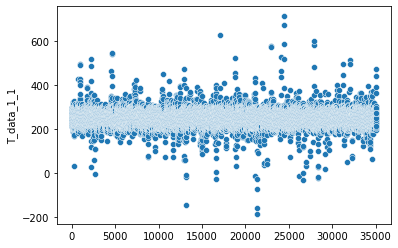

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


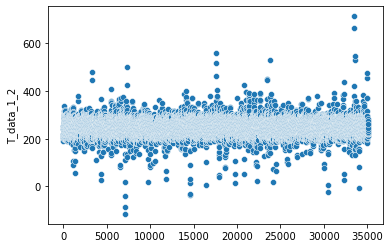

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


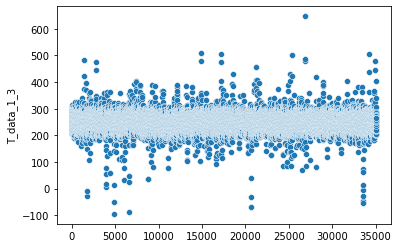

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


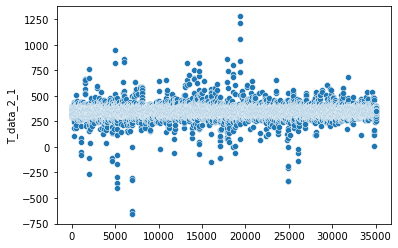

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


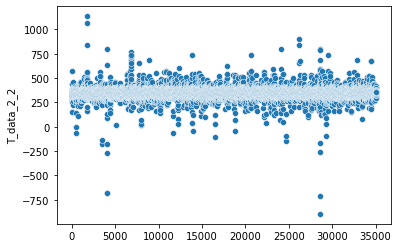

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


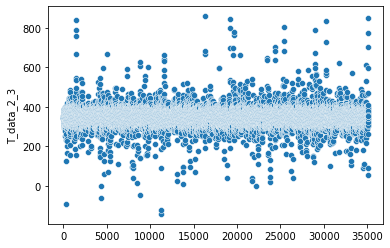

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


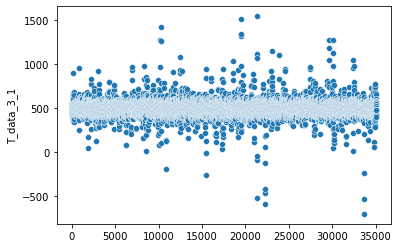

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


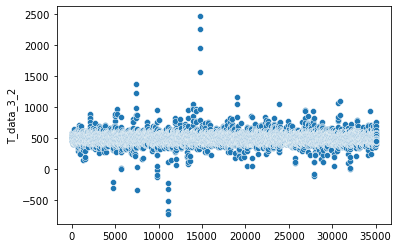

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


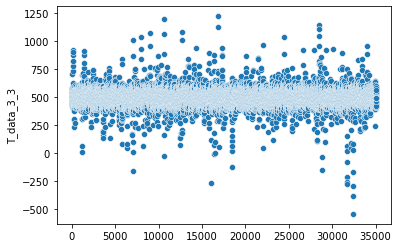

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


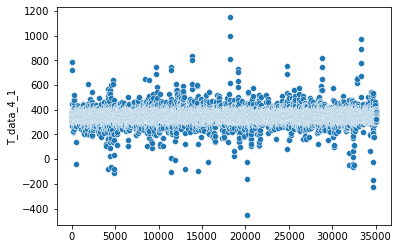

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


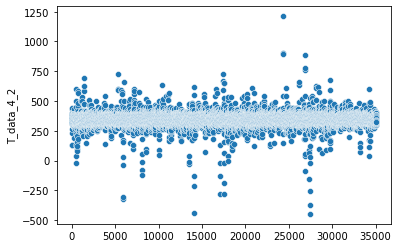

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


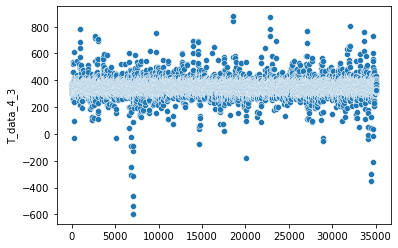

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


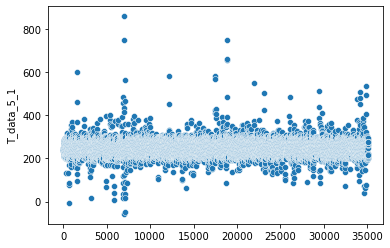

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


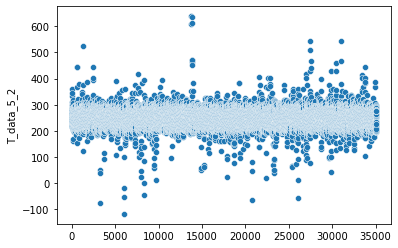

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


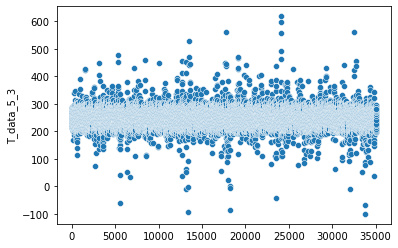

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


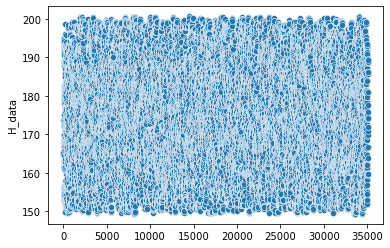

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


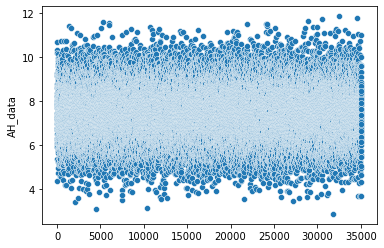

In [57]:
for i in df_prox.columns[1:-6]:
    sns.scatterplot(df_prox[i].index, df_prox[i]);
    # Show/save figure as desired.
    plt.show();

In [58]:
for i in df_prox.columns[1:-6]:
    print('mean value in',i,'=',df_prox[i].mean())

mean value in T_data_1_1 = 250.1827653405571
mean value in T_data_1_2 = 250.09181947811288
mean value in T_data_1_3 = 250.25399306050633
mean value in T_data_2_1 = 349.77569371167823
mean value in T_data_2_2 = 349.7220191073742
mean value in T_data_2_3 = 349.8282537192806
mean value in T_data_3_1 = 501.16050430153433
mean value in T_data_3_2 = 501.10776034982985
mean value in T_data_3_3 = 501.2332629877842
mean value in T_data_4_1 = 349.3189338846941
mean value in T_data_4_2 = 349.4383787252236
mean value in T_data_4_3 = 350.0293022482058
mean value in T_data_5_1 = 249.74953467370358
mean value in T_data_5_2 = 249.63186986073208
mean value in T_data_5_3 = 249.69455772612756
mean value in H_data = 174.7165708208575
mean value in AH_data = 7.49936517895334


Каждый датчик температур имеет область, вокруг которой сконцентрирована большая часть наблюдений

Можно ли увидеть зависимость температуры от часа?
Скорее нет, чем да

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


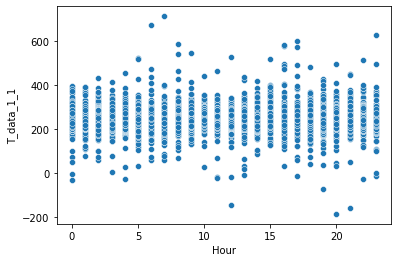

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


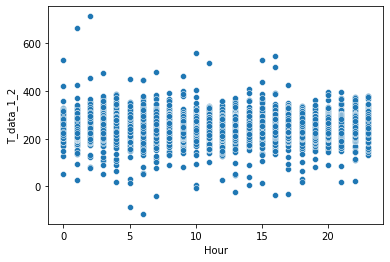

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


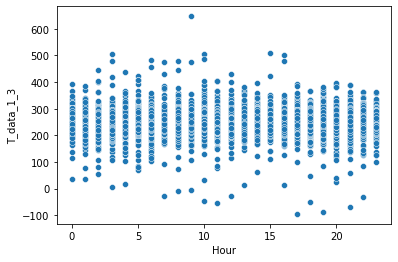

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


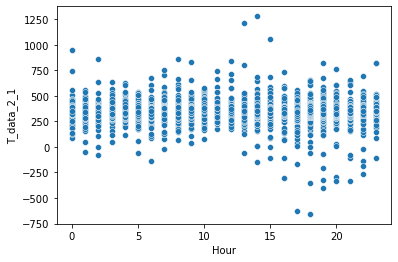

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


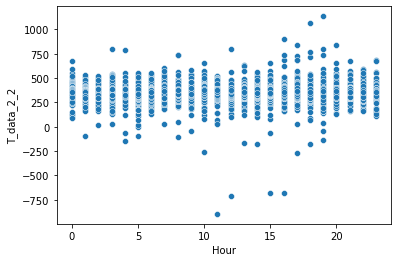

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


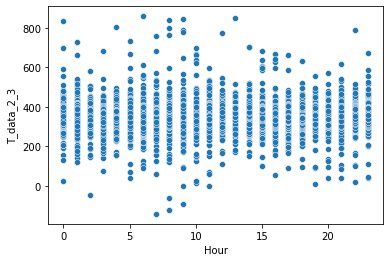

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


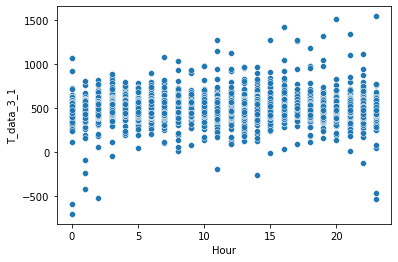

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


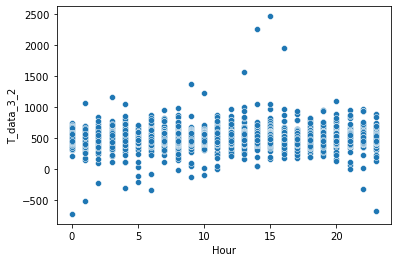

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


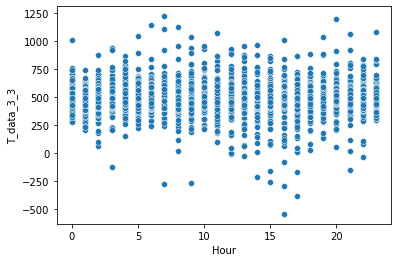

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


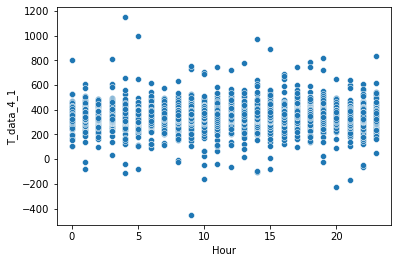

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


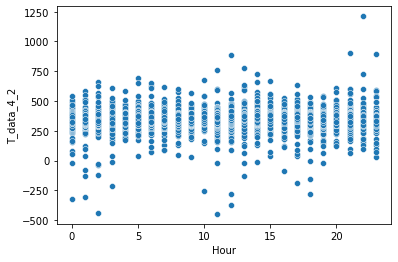

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


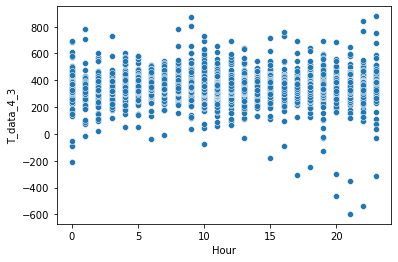

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


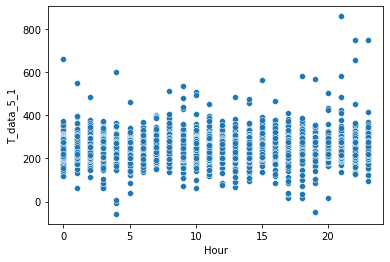

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


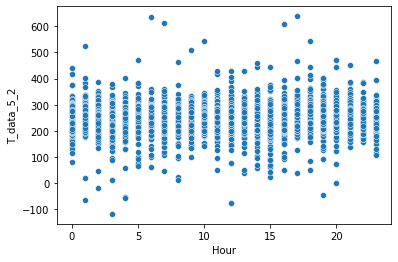

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


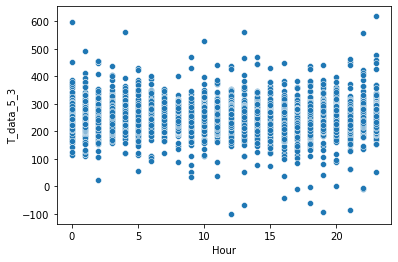

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


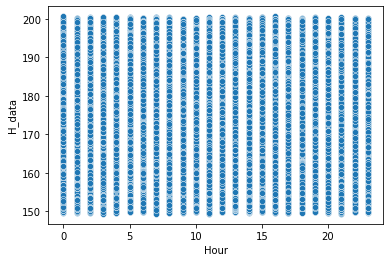

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


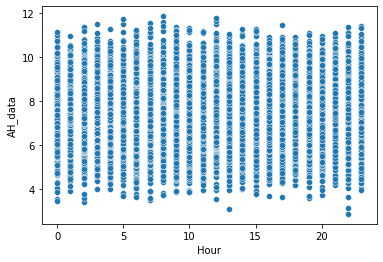

In [59]:
for i in df_prox.columns[1:-6]:
    sns.scatterplot(df_prox.Hour, df_prox[i]);
    # Show/save figure as desired.
    plt.show();

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


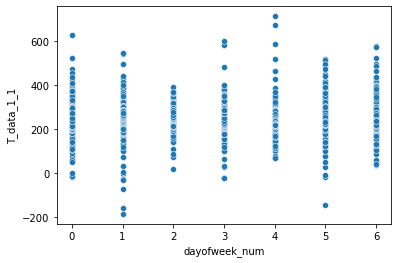

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


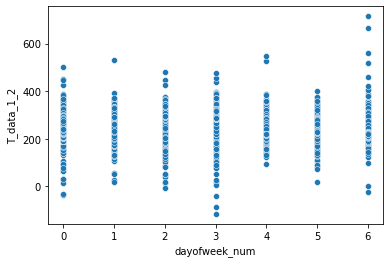

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


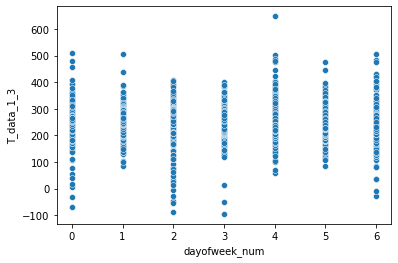

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


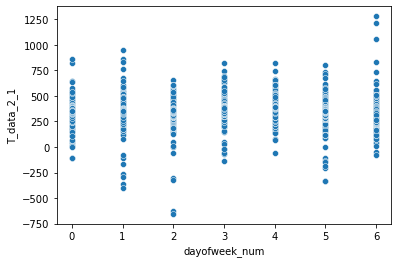

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


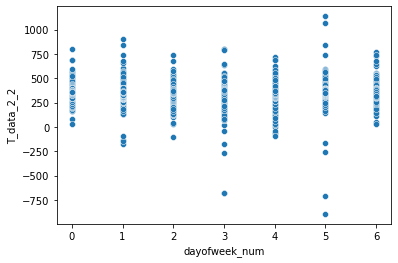

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


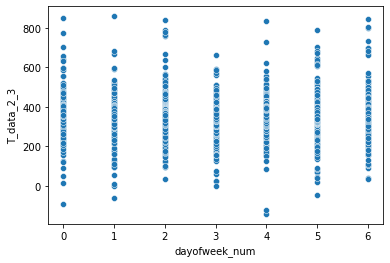

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


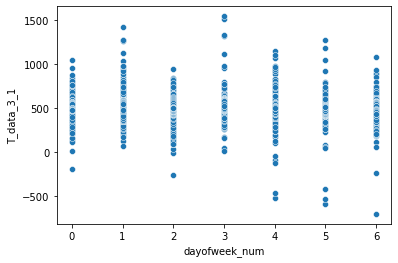

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


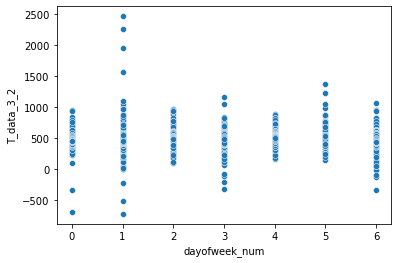

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


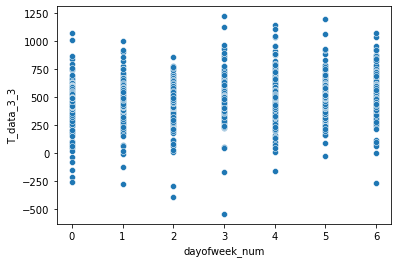

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


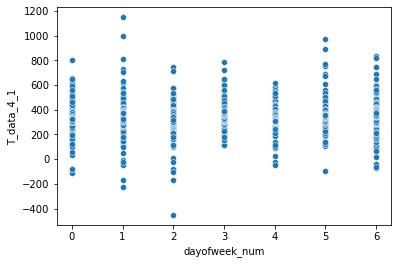

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


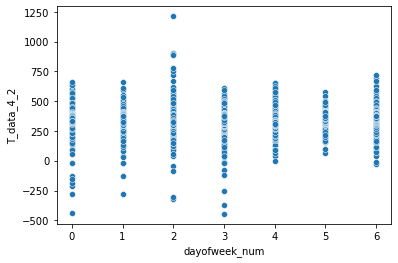

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


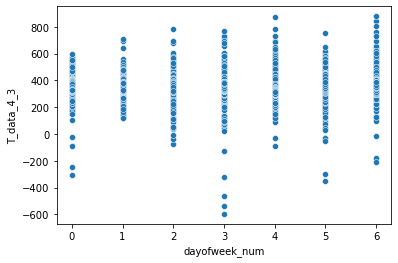

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


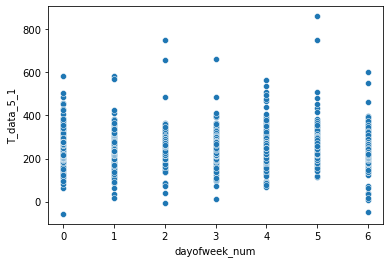

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


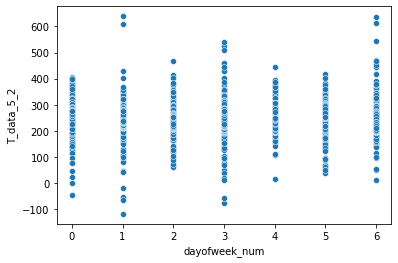

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


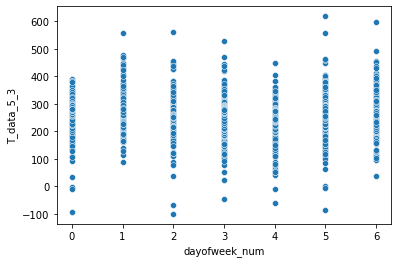

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


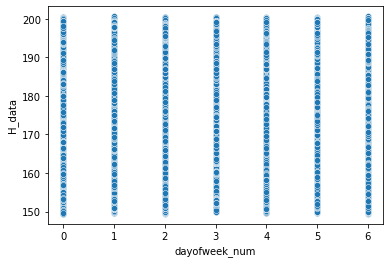

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


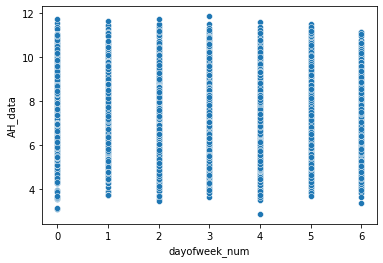

In [60]:
for i in df_prox.columns[1:-6]:
    sns.scatterplot(df_prox.dayofweek_num, df_prox[i]);
    # Show/save figure as desired.
    plt.show();

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


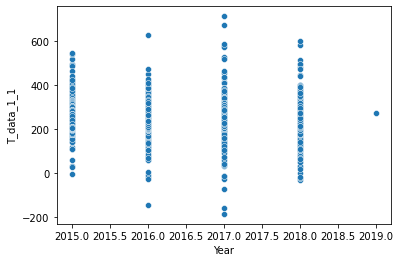

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


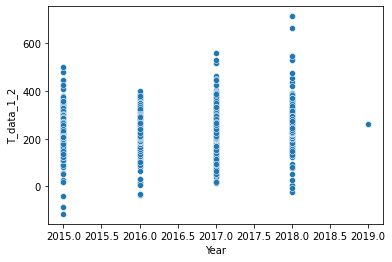

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


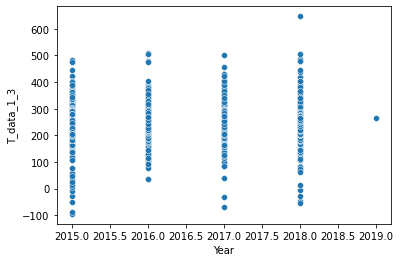

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


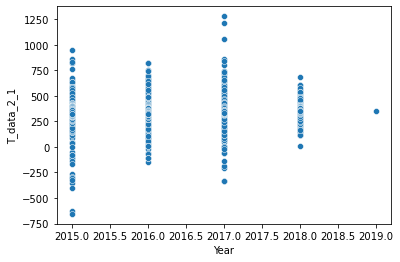

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


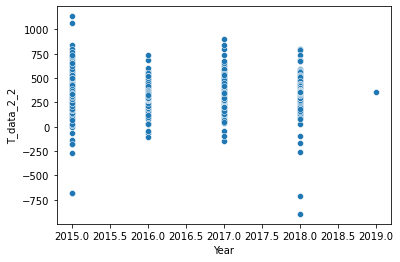

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


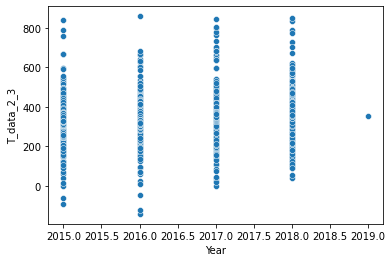

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


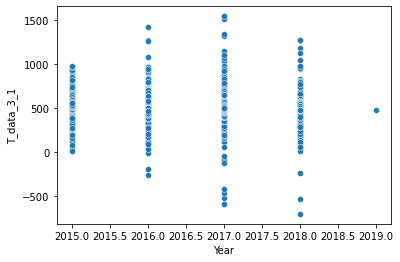

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


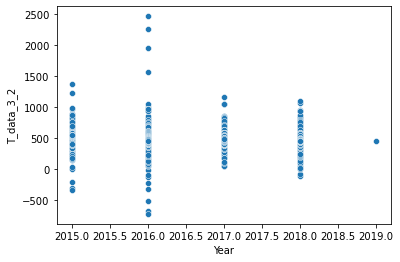

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


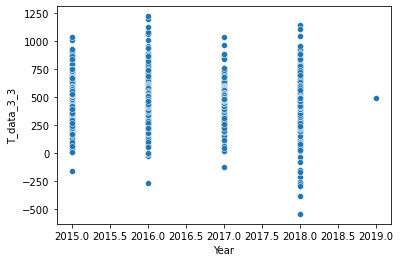

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


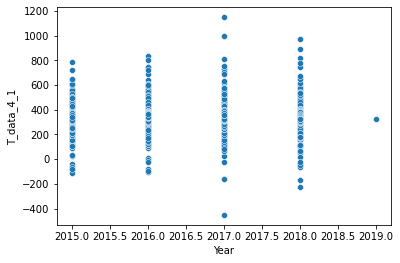

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


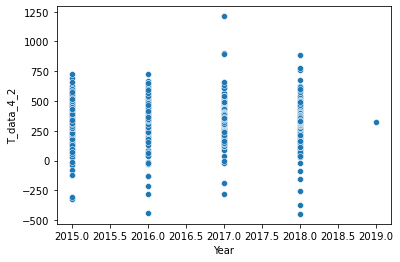

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


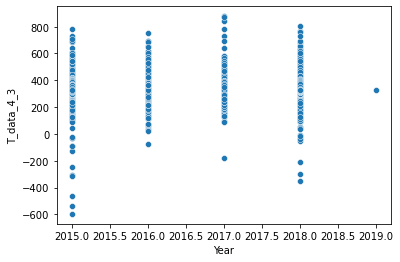

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


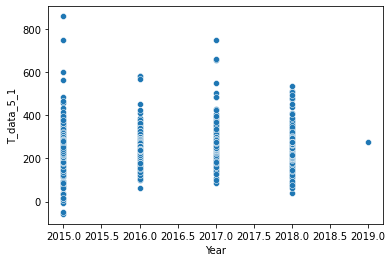

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


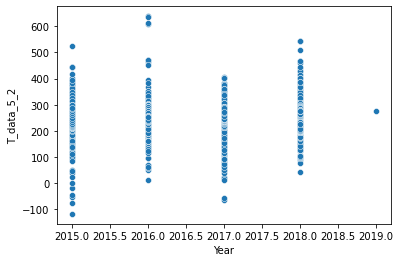

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


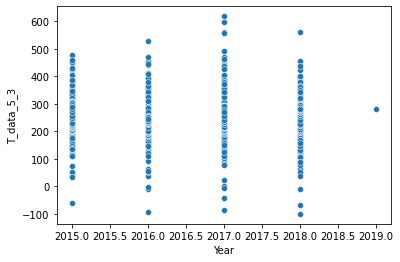

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


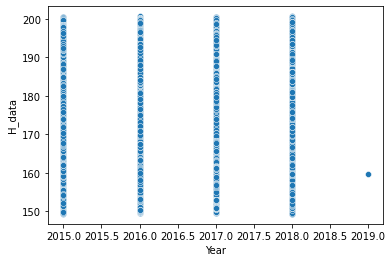

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


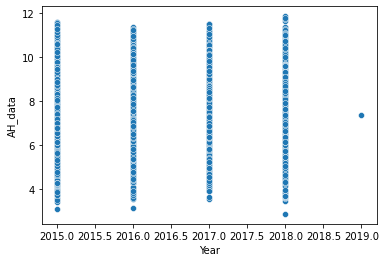

In [61]:
for i in df_prox.columns[1:-6]:
    sns.scatterplot(df_prox.Year, df_prox[i]);
    # Show/save figure as desired.
    plt.show();

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


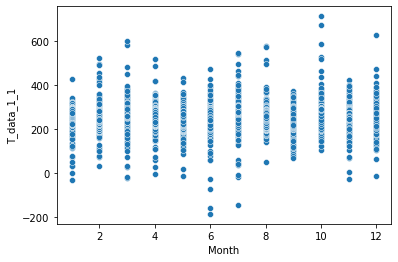

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


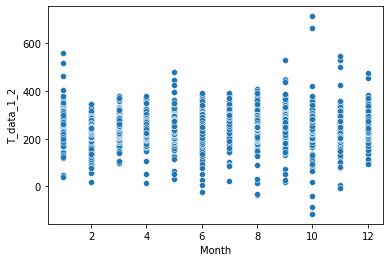

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


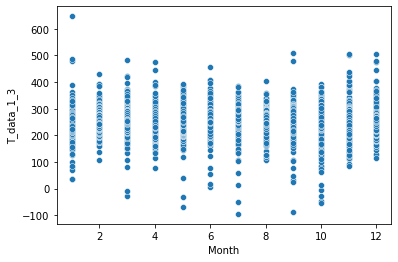

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


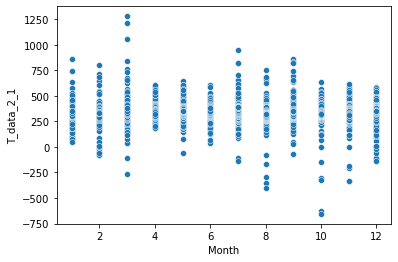

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


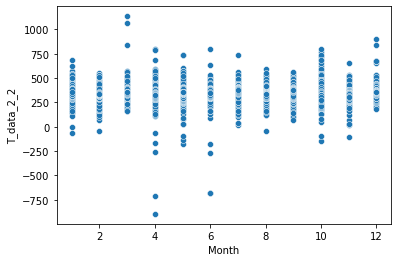

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


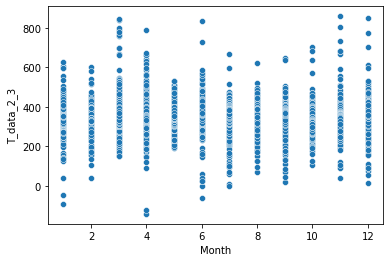

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


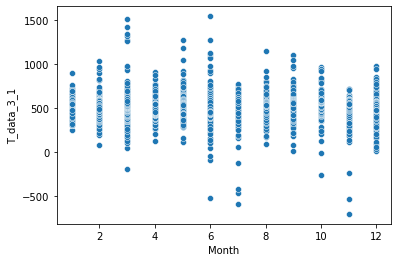

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


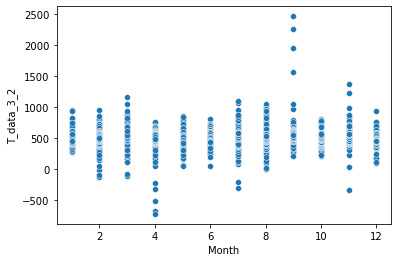

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


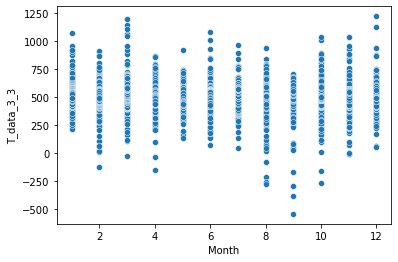

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


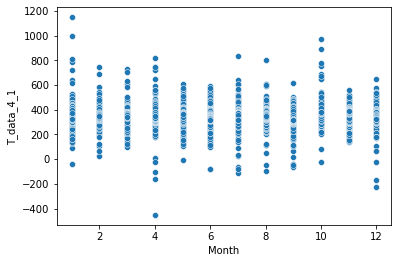

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


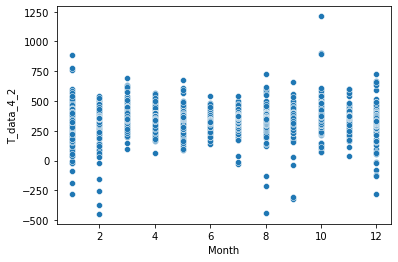

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


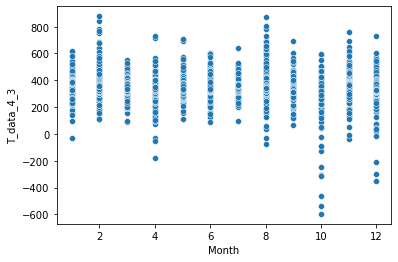

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


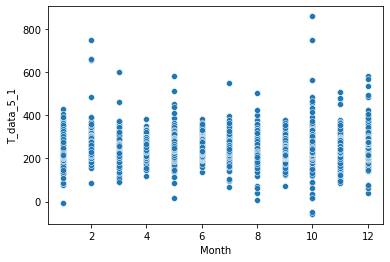

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


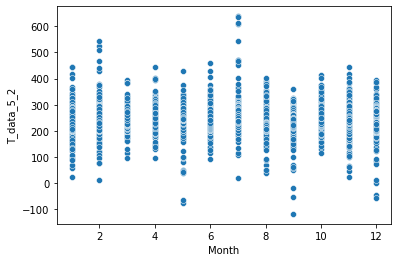

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


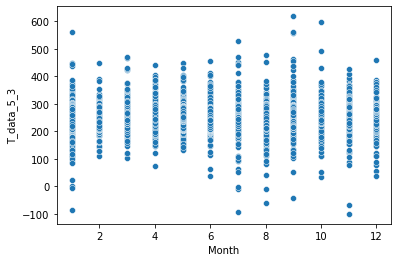

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


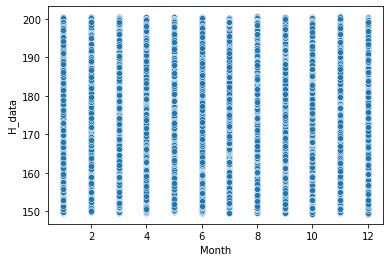

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


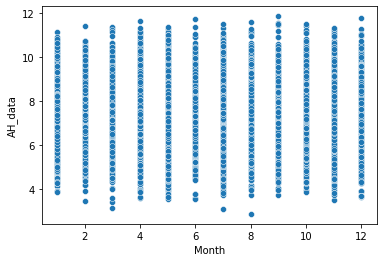

In [62]:
for i in df_prox.columns[1:-6]:
    sns.scatterplot(df_prox.Month, df_prox[i]);
    # Show/save figure as desired.
    plt.show();

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


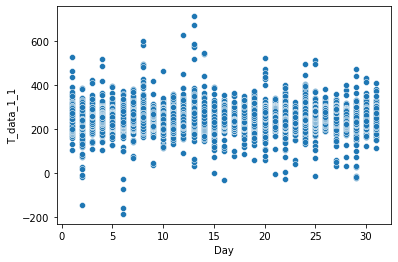

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


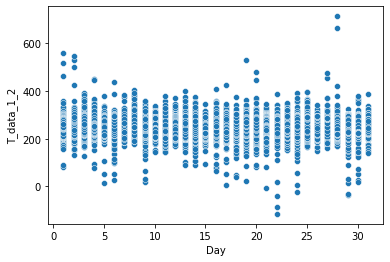

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


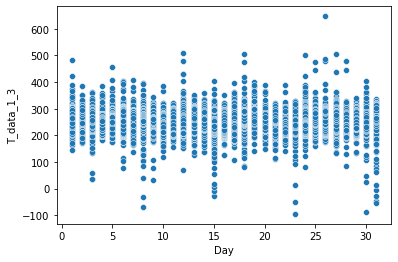

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


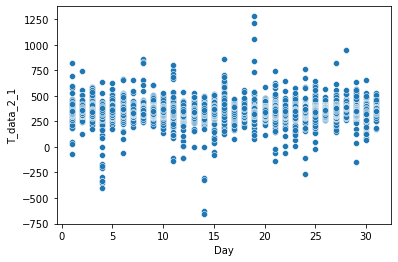

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


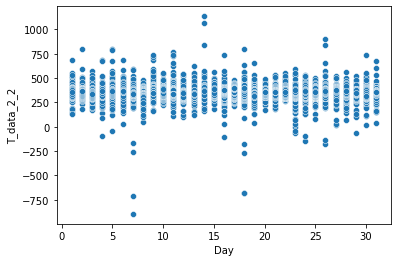

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


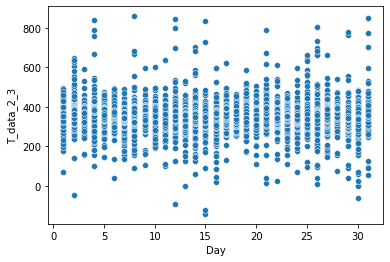

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


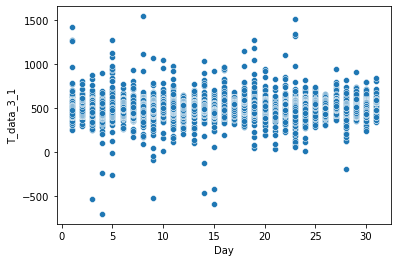

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


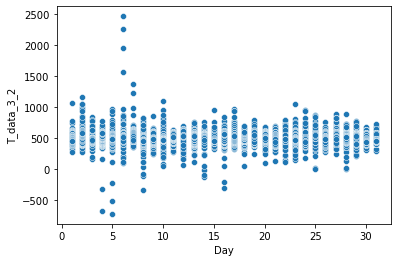

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


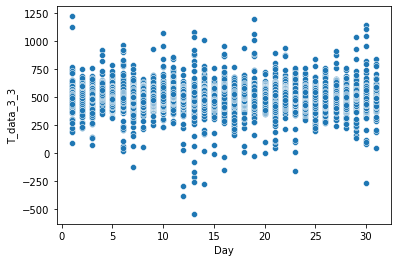

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


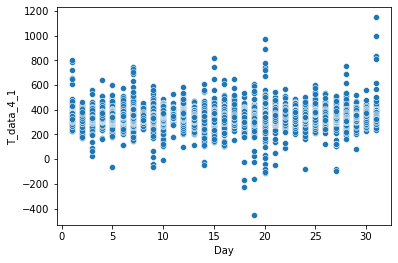

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


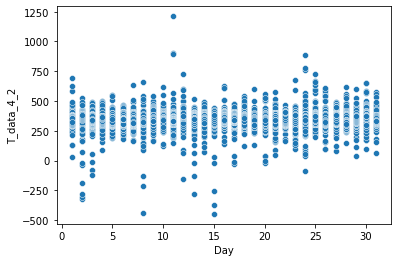

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


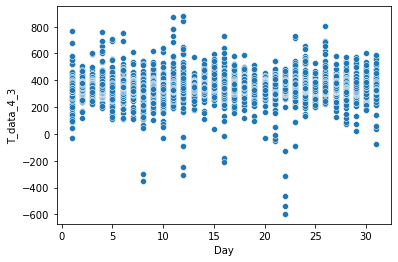

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


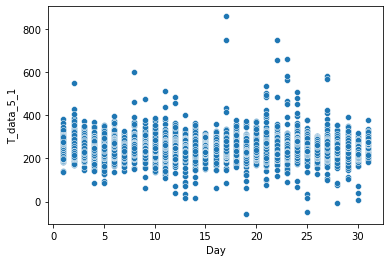

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


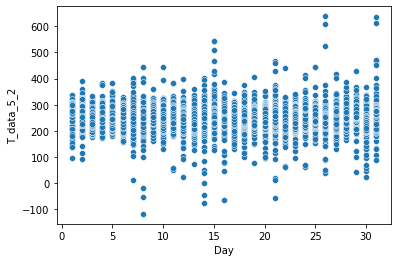

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


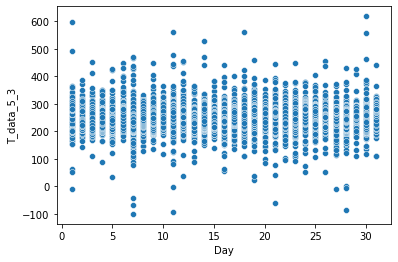

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


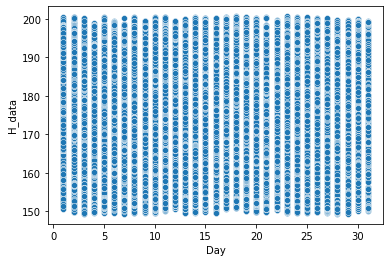

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


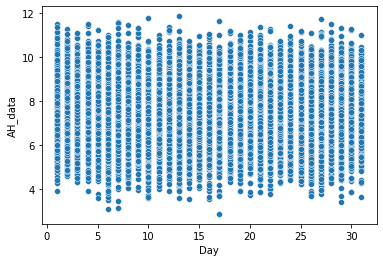

In [63]:
for i in df_prox.columns[1:-6]:
    sns.scatterplot(df_prox.Day, df_prox[i]);
    # Show/save figure as desired.
    plt.show();

Теперь построим модель, включив в неё указанные параметры даты

In [64]:
merged_xy_hourly_date = pd.merge(df_prox,df_train_y_hourdate, on = ['Date', 'Hour'], how = 'left')

In [65]:
merged_xy_hourly_date

Timestamp  T_data_1_1  T_data_1_2  T_data_1_3  T_data_2_1  \
0     2015-01-01 00:00:00  213.200000  213.566667  211.083333  320.850000   
1     2015-01-01 01:00:00  209.683333  204.683333  212.550000  289.533333   
2     2015-01-01 02:00:00  230.966667  191.100000  209.833333  291.166667   
3     2015-01-01 03:00:00  227.666667  221.666667  222.716667  325.783333   
4     2015-01-01 04:00:00  235.766667  239.816667  250.066667  346.933333   
...                   ...         ...         ...         ...         ...   
35060 2018-12-31 20:00:00  251.633333  264.766667  255.783333  378.866667   
35061 2018-12-31 21:00:00  302.150000  283.566667  255.316667  359.066667   
35062 2018-12-31 22:00:00  293.983333  273.033333  259.000000  355.266667   
35063 2018-12-31 23:00:00  271.000000  243.316667  264.533333  355.550000   
35064 2019-01-01 00:00:00  271.000000  261.000000  265.000000  353.000000   

       T_data_2_2  T_data_2_3  T_data_3_1  T_data_3_2  T_data_3_3  T_data_4_1  \
0      329.383333  344.283333  501.516667  473.000000  486.100000  367.400000   
1      270.583333  354.866667  528.633333  475.500000  490.866667  345.333333   
2      311.916667  342.050000  510.500000  489.450000  486.616667  358.633333   
3      153.416667  343.650000  456.733333  473.516667  481.183333  337.816667   
4      256.116667  345.766667  424.366667  480.950000  483.733333  336.000000   
...           ...         ...         ...         ...         ...         ...   
35060  367.866667  379.233333  474.083333  449.000000  467.533333  330.733333   
35061  354.583333  353.566667  481.033333  449.000000  492.000000  325.650000   
35062  355.250000  355.483333  481.000000  449.000000  492.533333  325.000000   
35063  359.000000  356.500000  481.000000  449.000000  491.000000  325.000000   
35064  359.000000  353.000000  481.000000  449.000000  491.000000  325.000000   

       T_data_4_2  T_data_4_3  T_data_5_1  T_data_5_2  T_data_5_3      H_data  \
0      353.350000  350.066667  246.666667  240.966667  239.800000  165.278333   
1      354.800000  343.583333  237.683333  239.100000  237.600000  164.746667   
2      345.116667  343.550000  237.850000  231.833333  238.816667  165.085833   
3      353.516667  349.916667  235.750000  239.933333  236.750000  165.422833   
4      354.833333  354.633333  240.100000  241.800000  238.966667  165.061500   
...           ...         ...         ...         ...         ...         ...   
35060  322.183333  323.433333  277.000000  281.366667  276.066667  186.105167   
35061  323.933333  326.250000  277.000000  279.016667  279.383333  163.874333   
35062  329.450000  326.566667  277.000000  276.216667  280.000000  159.678500   
35063  331.300000  328.000000  277.000000  276.000000  280.000000  159.759000   
35064  328.000000  328.000000  277.000000  276.000000  280.000000  159.730000   

       AH_data  Hour        Date  Year  Month  Day  dayofweek_num  Quality  
0         9.22     0  2015-01-01  2015      1    1              3      NaN  
1         7.82     1  2015-01-01  2015      1    1              3      NaN  
2         6.03     2  2015-01-01  2015      1    1              3      NaN  
3         8.36     3  2015-01-01  2015      1    1              3      NaN  
4         7.02     4  2015-01-01  2015      1    1              3      NaN  
...        ...   ...         ...   ...    ...  ...            ...      ...  
35060     6.38    20  2018-12-31  2018     12   31              0      NaN  
35061     8.37    21  2018-12-31  2018     12   31              0      NaN  
35062     6.13    22  2018-12-31  2018     12   31              0      NaN  
35063     8.44    23  2018-12-31  2018     12   31              0      NaN  
35064     7.35     0  2019-01-01  2019      1    1              1      NaN  

[35065 rows x 25 columns]

In [66]:
merged_xy_hourly_date = merged_xy_hourly_date[~merged_xy_hourly_date['Quality'].isna()]

In [67]:
X_date = merged_xy_hourly_date.drop(['Timestamp', 'Date', 'Quality'], axis = 1)
y_date = merged_xy_hourly_date.Quality

In [68]:
X_train_date, X_test_date, y_train_date, y_test_date = train_test_split(X_date, y_date, test_size=0.33, random_state=42)

In [69]:
first_model_date = CatBoostRegressor()

In [70]:
first_model_date.fit(X_train_date,y_train_date )

Learning rate set to 0.066258
0:	learn: 43.9877702	total: 4.87ms	remaining: 4.86s
1:	learn: 42.0004243	total: 9.4ms	remaining: 4.69s
2:	learn: 40.0752081	total: 13.9ms	remaining: 4.63s
3:	learn: 38.3462538	total: 18.3ms	remaining: 4.56s
4:	learn: 36.6773093	total: 22.8ms	remaining: 4.54s
5:	learn: 35.1368138	total: 27.4ms	remaining: 4.55s
6:	learn: 33.7450395	total: 32ms	remaining: 4.54s
7:	learn: 32.4287031	total: 36.3ms	remaining: 4.5s
8:	learn: 31.2202623	total: 41.2ms	remaining: 4.54s
9:	learn: 30.0761477	total: 45.6ms	remaining: 4.51s
10:	learn: 29.0011745	total: 57.6ms	remaining: 5.18s
11:	learn: 28.0384654	total: 63.4ms	remaining: 5.22s
12:	learn: 27.1620853	total: 69.2ms	remaining: 5.25s
13:	learn: 26.3146929	total: 73.9ms	remaining: 5.21s
14:	learn: 25.5582999	total: 78.5ms	remaining: 5.16s
15:	learn: 24.8289120	total: 82.7ms	remaining: 5.09s
16:	learn: 24.1827149	total: 86.8ms	remaining: 5.02s
17:	learn: 23.5506501	total: 91.3ms	remaining: 4.98s
18:	learn: 22.9807725	total: 9

In [71]:
date_preds = first_model_date.predict(X_test_date)

In [72]:
mean_absolute_error(date_preds, y_test_date)

10.842309403904276

In [73]:
first_model_date.get_feature_importance(prettified = True)

Feature Id  Importances
0      T_data_3_1    21.555074
1      T_data_3_2    21.433483
2      T_data_3_3    19.636888
3          H_data     6.346173
4      T_data_5_2     4.912594
5      T_data_5_1     4.260248
6      T_data_5_3     3.433791
7      T_data_1_1     3.001505
8      T_data_1_3     2.835838
9      T_data_1_2     2.334136
10     T_data_2_3     1.952652
11     T_data_2_2     1.625182
12     T_data_2_1     1.621554
13            Day     0.729841
14     T_data_4_3     0.697055
15     T_data_4_2     0.685165
16     T_data_4_1     0.661498
17           Hour     0.629564
18          Month     0.546492
19        AH_data     0.411983
20  dayofweek_num     0.388217
21           Year     0.301065

In [75]:
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.model_selection import TimeSeriesSplit
import statsmodels.api as sm

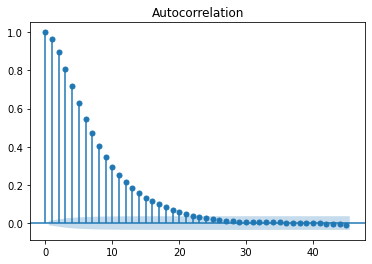

In [76]:
plot_acf(df_train_y_hourdate.Quality);

Есть заметная автокорреляция - можно попробовать использовать для предсказания значение с лагом

#### Добавлю еще простейших статистик в кач-ве признаков, описывающих поведение каждого датчика в течение часа

Поскольку среднее уже использовано, нужно переименовать колонки соотв. образом, чтобы не запутаться


In [ ]:
for col in df_prox.columns[1:18]:
     df_prox.rename(columns={col:col+'_mean'},inplace=True)

In [78]:
#возьмем станд. откл. по каждому датчику

df_prox_std = X_data.set_index('Timestamp')
df_prox_std = df_prox_std.resample('1H').std()
df_prox_std

for col in df_prox_std.columns[0:17]:
     df_prox_std.rename(columns={col:col+'_std'},inplace=True)
        
df_prox_std = df_prox_std.reset_index()
df_prox_std = df_prox_std.drop(['Timestamp', 'Hour'], axis = 1)
df_prox_std

T_data_1_1_std  T_data_1_2_std  T_data_1_3_std  T_data_2_1_std  \
0            0.988064        1.280448        0.278718       14.028814   
1            1.478566        5.823656        0.501692        4.432035   
2           12.494021        5.565329        0.905102        5.396693   
3            9.679030        4.721630        8.027689       14.936126   
4            1.511164        5.450833        5.011399        9.837436   
...               ...             ...             ...             ...   
35060        7.852381        4.260050        0.804472        1.961206   
35061       20.327676        4.093677        0.469102        6.721750   
35062       19.571245       10.184679        1.707412        1.783794   
35063        0.000000        8.154216        0.853044        1.534076   
35064             NaN             NaN             NaN             NaN   

       T_data_2_2_std  T_data_2_3_std  T_data_3_1_std  T_data_3_2_std  \
0           15.270545        1.043002       14.507148        0.000000   
1           14.720321        5.961648        2.201438        2.151074   
2           34.466536       12.464764       11.949754        3.824209   
3           45.102254        5.710012       15.651790        7.459476   
4           53.260820        1.670955        3.654422        7.055290   
...               ...             ...             ...             ...   
35060        2.346773        5.636944        9.492712        0.000000   
35061        9.219161        4.975760        0.181020        0.000000   
35062        9.181088        3.534295        0.000000        0.000000   
35063        0.000000        2.671253        0.000000        0.000000   
35064             NaN             NaN             NaN             NaN   

       T_data_3_3_std  T_data_4_1_std  T_data_4_2_std  T_data_4_3_std  \
0            2.844561       16.869590        2.503049        2.892812   
1            0.342803       15.090312        1.811451        1.013329   
2            2.443196        6.056140        2.477640        1.015557   
3            0.390205        4.339381        5.634313        2.676272   
4            1.351291        2.407615        5.886401        0.636906   
...               ...             ...             ...             ...   
35060       10.894668        1.849110        1.631176        5.156423   
35061        3.512689        0.898681        1.645401        1.129347   
35062        1.741485        0.000000        1.588358        0.592800   
35063        0.000000        0.000000        2.451565        0.000000   
35064             NaN             NaN             NaN             NaN   

       T_data_5_1_std  T_data_5_2_std  T_data_5_3_std  H_data_std  AH_data_std  
0            2.199127        0.181020        1.493489    2.044177          0.0  
1            2.361353        0.602256        0.494032    2.229762          0.0  
2            1.412115        2.156320        0.390205    2.274814          0.0  
3            1.114238        2.049114        0.772954    1.603766          0.0  
4            1.036618        1.893790        0.485961    1.908795          0.0  
...               ...             ...             ...         ...          ...  
35060        0.000000        0.551321        1.363777    2.109897          0.0  
35061        0.000000        0.892372        0.691147    9.325128          0.0  
35062        0.000000        0.415450        0.000000    2.254784          0.0  
35063        0.000000        0.000000        0.000000    1.793119          0.0  
35064             NaN             NaN             NaN         NaN          NaN  

[35065 rows x 17 columns]

In [79]:
#возьмем мин. значение по каждому датчику

df_prox_min = X_data.set_index('Timestamp')
df_prox_min = df_prox_min.resample('1H').min()
df_prox_min

for col in df_prox_min.columns[0:17]:
     df_prox_min.rename(columns={col:col+'_min'},inplace=True)
        
df_prox_min = df_prox_min.reset_index()
df_prox_min = df_prox_min.drop(['Timestamp', 'Date', 'Hour'], axis = 1)
df_prox_min

T_data_1_1_min  T_data_1_2_min  T_data_1_3_min  T_data_2_1_min  \
0                 211             210             211             300   
1                 208             193             212             285   
2                 213             186             209             285   
3                 213             207             212             303   
4                 232             229             239             335   
...               ...             ...             ...             ...   
35060             241             260             255             374   
35061             257             274             255             352   
35062             271             252             256             352   
35063             271             235             262             353   
35064             271             261             265             353   

       T_data_2_2_min  T_data_2_3_min  T_data_3_1_min  T_data_3_2_min  \
0                 301             343             474             473   
1                 256             346             523             473   
2                 262             329             487             481   
3                 113             331             434             466   
4                 152             344             421             467   
...               ...             ...             ...             ...   
35060             363             366             452             449   
35061             342             349             481             449   
35062             341             349             481             449   
35063             359             353             481             449   
35064             359             353             481             449   

       T_data_3_3_min  T_data_4_1_min  T_data_4_2_min  T_data_4_3_min  \
0                 481             331             348             346   
1                 490             325             351             342   
2                 483             347             343             342   
3                 481             333             344             346   
4                 481             333             342             353   
...               ...             ...             ...             ...   
35060             447             328             321             318   
35061             484             325             321             323   
35062             491             325             327             326   
35063             491             325             328             328   
35064             491             325             328             328   

       T_data_5_1_min  T_data_5_2_min  T_data_5_3_min  H_data_min  AH_data_min  
0                 241             240             238      161.27         9.22  
1                 235             237             237      160.30         7.82  
2                 235             229             238      159.44         6.03  
3                 235             235             236      161.94         8.36  
4                 238             240             238      160.78         7.02  
...               ...             ...             ...         ...          ...  
35060             277             280             274      179.59         6.38  
35061             277             277             278      156.77         8.37  
35062             277             276             280      154.42         6.13  
35063             277             276             280      155.64         8.44  
35064             277             276             280      159.73         7.35  

[35065 rows x 17 columns]

In [80]:
#возьмем макс.значение по каждому датчику

df_prox_max = X_data.set_index('Timestamp')

df_prox_max = df_prox_max.resample('1H').max()

for col in df_prox_max.columns[0:17]:
     df_prox_max.rename(columns={col:col+'_max'},inplace=True)
        
df_prox_max = df_prox_max.reset_index()
df_prox_max = df_prox_max.drop(['Timestamp', 'Date', 'Hour'], axis = 1)
df_prox_max

T_data_1_1_max  T_data_1_2_max  T_data_1_3_max  T_data_2_1_max  \
0                 214             215             212             347   
1                 213             213             213             299   
2                 249             206             212             303   
3                 248             228             238             353   
4                 238             247             255             361   
...               ...             ...             ...             ...   
35060             264             274             257             381   
35061             323             287             256             373   
35062             322             286             262             357   
35063             271             261             265             357   
35064             271             261             265             353   

       T_data_2_2_max  T_data_2_3_max  T_data_3_1_max  T_data_3_2_max  \
0                 353             347             522             473   
1                 300             363             531             481   
2                 371             363             527             493   
3                 271             349             486             488   
4                 329             349             433             488   
...               ...             ...             ...             ...   
35060             370             385             483             449   
35061             368             365             482             449   
35062             372             360             481             449   
35063             359             360             481             449   
35064             359             353             481             449   

       T_data_3_3_max  T_data_4_1_max  T_data_4_2_max  T_data_4_3_max  \
0                 490             386             356             355   
1                 491             366             357             346   
2                 490             366             351             346   
3                 482             347             361             354   
4                 486             340             361             355   
...               ...             ...             ...             ...   
35060             484             334             326             333   
35061             496             328             327             327   
35062             496             325             332             328   
35063             491             325             334             328   
35064             491             325             328             328   

       T_data_5_1_max  T_data_5_2_max  T_data_5_3_max  H_data_max  AH_data_max  
0                 249             241             243      171.24         9.22  
1                 244             240             238      170.52         7.82  
2                 239             237             239      168.55         6.03  
3                 239             242             238      170.12         8.36  
4                 241             246             240      170.15         7.02  
...               ...             ...             ...         ...          ...  
35060             277             282             278      191.68         6.38  
35061             277             280             280      188.57         8.37  
35062             277             277             280      165.08         6.13  
35063             277             276             280      164.18         8.44  
35064             277             276             280      159.73         7.35  

[35065 rows x 17 columns]

Создам единый датасет с такими признаками и обучу модель \
Также добавил значение с лагом (1) - т.е. предыдущее значение целевой переменной в кач-ве признака

In [ ]:
df_added_info = df_prox
df_added_info = pd.concat([df_added_info,df_prox_max,df_prox_min, df_prox_std ], axis = 1)

In [97]:
df_added_info

Timestamp  T_data_1_1_mean  T_data_1_2_mean  T_data_1_3_mean  \
0     2015-01-01 00:00:00       213.200000       213.566667       211.083333   
1     2015-01-01 01:00:00       209.683333       204.683333       212.550000   
2     2015-01-01 02:00:00       230.966667       191.100000       209.833333   
3     2015-01-01 03:00:00       227.666667       221.666667       222.716667   
4     2015-01-01 04:00:00       235.766667       239.816667       250.066667   
...                   ...              ...              ...              ...   
35060 2018-12-31 20:00:00       251.633333       264.766667       255.783333   
35061 2018-12-31 21:00:00       302.150000       283.566667       255.316667   
35062 2018-12-31 22:00:00       293.983333       273.033333       259.000000   
35063 2018-12-31 23:00:00       271.000000       243.316667       264.533333   
35064 2019-01-01 00:00:00       271.000000       261.000000       265.000000   

       T_data_2_1_mean  T_data_2_2_mean  T_data_2_3_mean  T_data_3_1_mean  \
0           320.850000       329.383333       344.283333       501.516667   
1           289.533333       270.583333       354.866667       528.633333   
2           291.166667       311.916667       342.050000       510.500000   
3           325.783333       153.416667       343.650000       456.733333   
4           346.933333       256.116667       345.766667       424.366667   
...                ...              ...              ...              ...   
35060       378.866667       367.866667       379.233333       474.083333   
35061       359.066667       354.583333       353.566667       481.033333   
35062       355.266667       355.250000       355.483333       481.000000   
35063       355.550000       359.000000       356.500000       481.000000   
35064       353.000000       359.000000       353.000000       481.000000   

       T_data_3_2_mean  T_data_3_3_mean  T_data_4_1_mean  T_data_4_2_mean  \
0           473.000000       486.100000       367.400000       353.350000   
1           475.500000       490.866667       345.333333       354.800000   
2           489.450000       486.616667       358.633333       345.116667   
3           473.516667       481.183333       337.816667       353.516667   
4           480.950000       483.733333       336.000000       354.833333   
...                ...              ...              ...              ...   
35060       449.000000       467.533333       330.733333       322.183333   
35061       449.000000       492.000000       325.650000       323.933333   
35062       449.000000       492.533333       325.000000       329.450000   
35063       449.000000       491.000000       325.000000       331.300000   
35064       449.000000       491.000000       325.000000       328.000000   

       T_data_4_3_mean  T_data_5_1_mean  T_data_5_2_mean  T_data_5_3_mean  \
0           350.066667       246.666667       240.966667       239.800000   
1           343.583333       237.683333       239.100000       237.600000   
2           343.550000       237.850000       231.833333       238.816667   
3           349.916667       235.750000       239.933333       236.750000   
4           354.633333       240.100000       241.800000       238.966667   
...                ...              ...              ...              ...   
35060       323.433333       277.000000       281.366667       276.066667   
35061       326.250000       277.000000       279.016667       279.383333   
35062       326.566667       277.000000       276.216667       280.000000   
35063       328.000000       277.000000       276.000000       280.000000   
35064       328.000000       277.000000       276.000000       280.000000   

       H_data_mean  AH_data_mean  Hour        Date  Year  Month  Day  \
0       165.278333          9.22     0  2015-01-01  2015      1    1   
1       164.746667          7.82     1  2015-01-01  2015      1    1   
2       165.085833          6.03     2  2015-01-01  2015      1 

In [98]:
merged_added_df = pd.merge(df_added_info,df_train_y_hourdate, on = ['Date', 'Hour'], how = 'left')
merged_added_df = merged_added_df[~merged_added_df['Quality'].isna()]

In [99]:
merged_added_df['Quality_t-1'] = merged_added_df['Quality'].shift(1)
merged_added_df['Quality_t-1'] = merged_added_df['Quality_t-1'].fillna(0)
merged_added_df['Week'] = merged_added_df.Timestamp.dt.isocalendar().week.astype(float)
merged_added_df['Quarter'] = merged_added_df.Timestamp.dt.quarter.astype(float)
merged_added_df = merged_added_df[1:] #уберем значения для t-1 = 0
merged_added_df = merged_added_df.reset_index(drop = True)
# merged_added_df['Quality_delta'] = abs(merged_added_df['Quality'] - merged_added_df['Quality_t-1']) #пока не совсем понял реализацию
merged_added_df = merged_added_df.drop(['Date'], axis = 1)
merged_added_df

Timestamp  T_data_1_1_mean  T_data_1_2_mean  T_data_1_3_mean  \
0     2015-01-04 01:00:00       273.600000       231.833333       266.800000   
1     2015-01-04 02:00:00       250.333333       227.033333       256.350000   
2     2015-01-04 03:00:00       240.400000       239.350000       249.250000   
3     2015-01-04 04:00:00       227.366667       231.133333       235.866667   
4     2015-01-04 05:00:00       218.350000       213.283333       206.133333   
...                   ...              ...              ...              ...   
29178 2018-05-03 19:00:00       258.183333       256.633333       259.933333   
29179 2018-05-03 20:00:00       259.866667       254.333333       259.366667   
29180 2018-05-03 21:00:00       258.866667       254.250000       263.133333   
29181 2018-05-03 22:00:00       253.100000       255.916667       257.500000   
29182 2018-05-03 23:00:00       256.483333       258.583333       257.783333   

       T_data_2_1_mean  T_data_2_2_mean  T_data_2_3_mean  T_data_3_1_mean  \
0           322.700000       334.216667       347.133333       501.133333   
1           326.583333       333.666667       317.716667       511.183333   
2           325.750000       325.400000       310.500000       522.683333   
3           320.233333       317.183333       320.066667       516.683333   
4           312.833333       315.750000       311.566667       499.666667   
...                ...              ...              ...              ...   
29178       376.350000       376.350000       363.200000       448.050000   
29179       368.883333       359.183333       357.383333       427.350000   
29180       360.383333       349.933333       351.833333       432.900000   
29181       353.000000       350.966667       355.566667       442.366667   
29182       347.750000       340.183333       352.933333       460.716667   

       T_data_3_2_mean  T_data_3_3_mean  T_data_4_1_mean  T_data_4_2_mean  \
0           500.366667       579.600000       341.550000       398.683333   
1           498.116667       492.366667       345.350000       395.066667   
2           498.966667       538.716667       341.283333       379.883333   
3           504.433333       515.666667       345.583333       365.300000   
4           508.283333       499.316667       342.166667       354.183333   
...                ...              ...              ...              ...   
29178       430.566667       457.583333       359.100000       346.066667   
29179       438.733333       449.700000       349.266667       348.866667   
29180       430.483333       443.633333       348.233333       355.283333   
29181       439.433333       439.750000       347.450000       352.200000   
29182       445.300000       439.816667       343.533333       333.083333   

       T_data_4_3_mean  T_data_5_1_mean  T_data_5_2_mean  T_data_5_3_mean  \
0           334.350000       237.016667       245.683333       231.966667   
1           332.233333       248.850000       254.150000       244.783333   
2           337.816667       260.000000       260.516667       248.550000   
3           345.883333       265.866667       264.950000       273.866667   
4           344.666667       269.233333       268.083333       265.250000   
...                ...              ...              ...              ...   
29178       348.666667       232.700000       253.100000       249.550000   
29179       346.666667       242.850000       254.350000       246.216667   
29180       344.016667       251.100000       259.933333       247.666667   
29181       344.583333       255.683333       267.066667       247.433333   
29182       380.483333       252.533333       259.650000       241.883333   

       H_data_mean  AH_data_mean  Hour  Year  Month  Day  dayofweek_num  \
0       156.000167          6.96     1  2015      1    4              6   
1       156.047000          7.29     2  2015      1    4              6   
2       188.481667          7.11     3  2015      1    

In [100]:
merged_added_df = merged_added_df.set_index('Timestamp')

In [101]:
model_added_info = CatBoostRegressor(eval_metric = 'MAE')

In [102]:
X_added = merged_added_df.drop('Quality', axis = 1)
y_added = merged_added_df.Quality
X_train_added, X_test_added, y_train_added, y_test_added = train_test_split(X_added, y_added, test_size=0.33, random_state=42)

In [103]:
model_added_info.fit(X_train_added,y_train_added)

Learning rate set to 0.066257
0:	learn: 35.5987203	total: 9.61ms	remaining: 9.6s
1:	learn: 33.4611794	total: 18.5ms	remaining: 9.25s
2:	learn: 31.5196058	total: 27.5ms	remaining: 9.15s
3:	learn: 29.6845822	total: 36.3ms	remaining: 9.03s
4:	learn: 28.0167812	total: 45.1ms	remaining: 8.97s
5:	learn: 26.4187325	total: 53.8ms	remaining: 8.9s
6:	learn: 24.9466659	total: 62.3ms	remaining: 8.84s
7:	learn: 23.6290621	total: 70.9ms	remaining: 8.8s
8:	learn: 22.3761140	total: 79.7ms	remaining: 8.78s
9:	learn: 21.1761348	total: 88.3ms	remaining: 8.74s
10:	learn: 20.0487720	total: 97.3ms	remaining: 8.75s
11:	learn: 19.0265651	total: 106ms	remaining: 8.74s
12:	learn: 18.1057041	total: 115ms	remaining: 8.71s
13:	learn: 17.2205626	total: 123ms	remaining: 8.67s
14:	learn: 16.3957498	total: 132ms	remaining: 8.64s
15:	learn: 15.6433760	total: 140ms	remaining: 8.62s
16:	learn: 14.9600938	total: 149ms	remaining: 8.6s
17:	learn: 14.3238744	total: 157ms	remaining: 8.57s
18:	learn: 13.7051375	total: 166ms	re

In [104]:
preds_added = model_added_info.predict(X_test_added)

In [251]:
mean_absolute_error(preds_added,y_test_added)

5.912837034721085

#### Это значение метрики выглядит неплохим!

In [264]:
model_added_info.get_feature_importance(prettified = True)
#можно отобрать N фичей, потом сделать перебор параметров
#судя по незначимости дня недели - нет необходимости выделять выходной/рабочий день

Feature Id  Importances
0       Quality_t-1    69.264345
1    T_data_3_1_max     2.953973
2   T_data_3_3_mean     2.541665
3    T_data_3_3_max     2.139734
4    T_data_3_1_min     2.085669
..              ...          ...
71    dayofweek_num     0.019981
72            Month     0.016044
73      AH_data_max     0.008134
74          Quarter     0.005437
75      AH_data_std     0.000000

[76 rows x 2 columns]

В модели получилось достаточно много признаков - можно ли отобрать самые важные без особой потери кач-ва?

In [253]:
select_feats_added = CatBoostRegressor()

In [254]:
feats = select_feats_added.select_features(
                X_added,
                y_added,
                features_for_select='0-73',
                num_features_to_select=20,
                train_final_model = False)

Learning rate set to 0.071153
Step #1 out of 1
0:	learn: 43.4445037	total: 22.8ms	remaining: 22.7s
1:	learn: 40.7971728	total: 33.7ms	remaining: 16.8s
2:	learn: 38.2720509	total: 45.5ms	remaining: 15.1s
3:	learn: 35.9490216	total: 56.4ms	remaining: 14s
4:	learn: 33.8466281	total: 66.7ms	remaining: 13.3s
5:	learn: 31.8658948	total: 77ms	remaining: 12.8s
6:	learn: 29.9938059	total: 87.1ms	remaining: 12.4s
7:	learn: 28.3308354	total: 97.1ms	remaining: 12s
8:	learn: 26.7781302	total: 107ms	remaining: 11.8s
9:	learn: 25.3478055	total: 117ms	remaining: 11.6s
10:	learn: 23.9757174	total: 127ms	remaining: 11.4s
11:	learn: 22.7905829	total: 137ms	remaining: 11.3s
12:	learn: 21.6480547	total: 147ms	remaining: 11.2s
13:	learn: 20.6216927	total: 157ms	remaining: 11.1s
14:	learn: 19.6688273	total: 167ms	remaining: 11s
15:	learn: 18.7656910	total: 177ms	remaining: 10.9s
16:	learn: 17.9477022	total: 188ms	remaining: 10.8s
17:	learn: 17.1823378	total: 199ms	remaining: 10.9s
18:	learn: 16.4648846	total

In [255]:
feats
# ['T_data_1_1_mean',
#   'T_data_1_3_mean',
#   'T_data_3_1_mean',
#   'T_data_3_2_mean',
#   'T_data_3_3_mean',
#   'T_data_5_1_mean',
#   'T_data_5_2_mean',
#   'T_data_5_3_mean',
#   'T_data_1_1_max',
#   'T_data_3_1_max',
#   'T_data_3_2_max',
#   'T_data_3_3_max',
#   'T_data_5_2_max',
#   'H_data_max',
#   'T_data_1_2_min',
#   'T_data_3_1_min',
#   'T_data_3_2_min',
#   'T_data_3_3_min',
#   'H_data_min',
#   'Quality_t-1']

{'selected_features': [6,
  7,
  8,
  12,
  22,
  28,
  29,
  30,
  34,
  35,
  36,
  37,
  40,
  41,
  45,
  46,
  47,
  53,
  54,
  73],
 'eliminated_features_names': ['AH_data_std',
  'Year',
  'AH_data_min',
  'AH_data_max',
  'Month',
  'dayofweek_num',
  'T_data_4_3_mean',
  'Hour',
  'T_data_4_2_mean',
  'T_data_4_1_mean',
  'Day',
  'T_data_4_2_max',
  'T_data_4_3_max',
  'T_data_4_3_std',
  'T_data_4_1_max',
  'T_data_4_1_min',
  'T_data_4_2_min',
  'AH_data_mean',
  'T_data_1_3_std',
  'T_data_4_1_std',
  'T_data_2_1_std',
  'T_data_5_2_std',
  'T_data_2_3_std',
  'T_data_4_3_min',
  'T_data_2_2_mean',
  'T_data_5_3_std',
  'T_data_4_2_std',
  'T_data_1_2_std',
  'T_data_1_1_std',
  'T_data_2_3_min',
  'T_data_2_2_std',
  'T_data_3_1_std',
  'T_data_5_1_std',
  'T_data_1_3_mean',
  'T_data_2_1_min',
  'T_data_5_2_mean',
  'T_data_3_2_std',
  'T_data_3_3_std',
  'H_data_std',
  'T_data_2_2_max',
  'T_data_1_3_max',
  'T_data_2_1_max',
  'T_data_5_3_mean',
  'T_data_1_1_min',
 

In [256]:
X_shrinked = merged_added_df[['T_data_1_1_mean',
  'T_data_1_3_mean',
  'T_data_3_1_mean',
  'T_data_3_2_mean',
  'T_data_3_3_mean',
  'T_data_5_1_mean',
  'T_data_5_2_mean',
  'T_data_5_3_mean',
  'T_data_1_1_max',
  'T_data_3_1_max',
  'T_data_3_2_max',
  'T_data_3_3_max',
  'T_data_5_2_max',
  'H_data_max',
  'T_data_1_2_min',
  'T_data_3_1_min',
  'T_data_3_2_min',
  'T_data_3_3_min',
  'H_data_min',
  'Quality_t-1']]

In [257]:
shrinked_model = CatBoostRegressor(eval_metric = 'MAE')
X_train_shr, X_test_shr, y_train_shr, y_test_shr = train_test_split(X_shrinked, y_added, test_size=0.33, random_state=42)

In [258]:
shrinked_model.fit(X_train_shr,y_train_shr)

Learning rate set to 0.066257
0:	learn: 35.5345757	total: 4.84ms	remaining: 4.83s
1:	learn: 33.4195465	total: 9.65ms	remaining: 4.82s
2:	learn: 31.4224558	total: 14.5ms	remaining: 4.83s
3:	learn: 29.5869913	total: 18.8ms	remaining: 4.69s
4:	learn: 27.8603592	total: 23.3ms	remaining: 4.63s
5:	learn: 26.2560125	total: 27.6ms	remaining: 4.58s
6:	learn: 24.8073331	total: 32ms	remaining: 4.54s
7:	learn: 23.4391938	total: 36.2ms	remaining: 4.49s
8:	learn: 22.1663393	total: 40.6ms	remaining: 4.46s
9:	learn: 20.9968342	total: 44.7ms	remaining: 4.43s
10:	learn: 19.8904152	total: 49.8ms	remaining: 4.47s
11:	learn: 18.8763701	total: 54.2ms	remaining: 4.47s
12:	learn: 17.9156881	total: 58.7ms	remaining: 4.45s
13:	learn: 17.0327182	total: 63ms	remaining: 4.44s
14:	learn: 16.2401308	total: 67.4ms	remaining: 4.43s
15:	learn: 15.5090997	total: 71.8ms	remaining: 4.42s
16:	learn: 14.8086247	total: 76.3ms	remaining: 4.41s
17:	learn: 14.1893298	total: 80.7ms	remaining: 4.4s
18:	learn: 13.6036263	total: 85

In [259]:
preds_shrinked = shrinked_model.predict(X_test_shr)
mean_absolute_error(preds_shrinked,y_test_shr)

6.204571056442675

Удалили 54 признака - потеряли ~0.3 в качестве

Можно ли подобрать гиперпараметры таким образом, чтобы кач-во стало лучше?

In [260]:
search_model = CatBoostRegressor(eval_metric = 'MAE')

grid = {'learning_rate': [0.03, 0.05, 0.1],
        'depth': [4, 6, 8, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}

randomized_search_result = search_model.randomized_search(grid,
                                                   X=X_train_shr,
                                                   y=y_train_shr,
                                                   plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 362.3700081	test: 363.3144349	best: 363.3144349 (0)	total: 3.27ms	remaining: 3.27s
1:	learn: 326.1608595	test: 327.0427786	best: 327.0427786 (1)	total: 6.87ms	remaining: 3.43s
2:	learn: 293.5659309	test: 294.4086463	best: 294.4086463 (2)	total: 9.54ms	remaining: 3.17s
3:	learn: 264.2312930	test: 265.0504518	best: 265.0504518 (3)	total: 12.1ms	remaining: 3.01s
4:	learn: 237.8255053	test: 238.6424284	best: 238.6424284 (4)	total: 14.8ms	remaining: 2.94s
5:	learn: 214.0634968	test: 214.8826930	best: 214.8826930 (5)	total: 17.5ms	remaining: 2.9s
6:	learn: 192.6777057	test: 193.4466156	best: 193.4466156 (6)	total: 20.5ms	remaining: 2.91s
7:	learn: 173.4232184	test: 174.1762830	best: 174.1762830 (7)	total: 23.4ms	remaining: 2.9s
8:	learn: 156.0928234	test: 156.8704905	best: 156.8704905 (8)	total: 26ms	remaining: 2.86s
9:	learn: 140.4949084	test: 141.2392108	best: 141.2392108 (9)	total: 28.8ms	remaining: 2.85s
10:	learn: 126.4575561	test: 127.2008553	best: 127.2008553 (10)	total: 32.

In [261]:
# randomized_search_result
#{'depth': 6, 'l2_leaf_reg': 1, 'learning_rate': 0.05}

In [262]:
search_model.fit(X_train_shr,y_train_shr)

0:	learn: 36.0880332	total: 5.92ms	remaining: 5.92s
1:	learn: 34.4901895	total: 11.4ms	remaining: 5.67s
2:	learn: 32.9247281	total: 16.8ms	remaining: 5.59s
3:	learn: 31.4565362	total: 22.3ms	remaining: 5.56s
4:	learn: 30.0489951	total: 26.9ms	remaining: 5.34s
5:	learn: 28.7186854	total: 31.5ms	remaining: 5.21s
6:	learn: 27.4973517	total: 36.1ms	remaining: 5.12s
7:	learn: 26.3171363	total: 40.6ms	remaining: 5.03s
8:	learn: 25.2047979	total: 45.5ms	remaining: 5.01s
9:	learn: 24.1291339	total: 50.8ms	remaining: 5.03s
10:	learn: 23.1324285	total: 55.5ms	remaining: 4.99s
11:	learn: 22.1842929	total: 60.2ms	remaining: 4.96s
12:	learn: 21.2840695	total: 64.7ms	remaining: 4.92s
13:	learn: 20.4260705	total: 69.3ms	remaining: 4.88s
14:	learn: 19.6314122	total: 73.9ms	remaining: 4.86s
15:	learn: 18.8841332	total: 78.6ms	remaining: 4.83s
16:	learn: 18.1746983	total: 83.3ms	remaining: 4.82s
17:	learn: 17.5106247	total: 88.3ms	remaining: 4.82s
18:	learn: 16.8637286	total: 93.5ms	remaining: 4.83s
19:

In [263]:
search_preds = search_model.predict(X_test_shr)
mean_absolute_error(search_preds, y_test_shr)

6.193464232526559

Перепроверим качество модели через TimeSeriesCV

In [280]:
tscv = TimeSeriesSplit()

In [281]:
for train_index, test_index in tscv.split(X_shrinked):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_ts_train, X_ts_test = X_shrinked.iloc[train_index], X_shrinked.iloc[test_index]
    y_ts_train, y_ts_test = y_added.iloc[train_index], y_added.iloc[test_index]

TRAIN: [   0    1    2 ... 4865 4866 4867] TEST: [4868 4869 4870 ... 9728 9729 9730]
TRAIN: [   0    1    2 ... 9728 9729 9730] TEST: [ 9731  9732  9733 ... 14591 14592 14593]
TRAIN: [    0     1     2 ... 14591 14592 14593] TEST: [14594 14595 14596 ... 19454 19455 19456]
TRAIN: [    0     1     2 ... 19454 19455 19456] TEST: [19457 19458 19459 ... 24317 24318 24319]
TRAIN: [    0     1     2 ... 24317 24318 24319] TEST: [24320 24321 24322 ... 29180 29181 29182]


In [282]:
ts_cv_regressor = CatBoostRegressor()

In [283]:
tscv = TimeSeriesSplit(n_splits = 5)
mae = []
for train_index, test_index in tscv.split(X_shrinked):
    
    X_ts_train, X_ts_test = X_shrinked.iloc[train_index], X_shrinked.iloc[test_index]
    y_ts_train, y_ts_test = y_added.iloc[train_index], y_added.iloc[test_index]
    
    
    ts_cv_regressor.fit(X_ts_train, y_ts_train)
    
    predictions = ts_cv_regressor.predict(X_ts_test)
    true_values = y_ts_test.values
    mae.append(mean_absolute_error(true_values, predictions))
    
print("MAE: {}".format(np.mean(mae)))

Learning rate set to 0.051731
0:	learn: 43.4672763	total: 3.21ms	remaining: 3.21s
1:	learn: 41.6454025	total: 6.25ms	remaining: 3.12s
2:	learn: 39.8334469	total: 9.06ms	remaining: 3.01s
3:	learn: 38.1266501	total: 12ms	remaining: 2.99s
4:	learn: 36.5581324	total: 14.7ms	remaining: 2.93s
5:	learn: 35.1694789	total: 17.4ms	remaining: 2.88s
6:	learn: 33.6839108	total: 20.1ms	remaining: 2.85s
7:	learn: 32.3622896	total: 22.7ms	remaining: 2.82s
8:	learn: 31.0964263	total: 25.4ms	remaining: 2.8s
9:	learn: 29.8514127	total: 28.2ms	remaining: 2.79s
10:	learn: 28.6619751	total: 30.8ms	remaining: 2.77s
11:	learn: 27.5353994	total: 33.4ms	remaining: 2.75s
12:	learn: 26.4599924	total: 36ms	remaining: 2.73s
13:	learn: 25.4618024	total: 39.3ms	remaining: 2.77s
14:	learn: 24.5054254	total: 42.3ms	remaining: 2.77s
15:	learn: 23.6157113	total: 44.9ms	remaining: 2.76s
16:	learn: 22.7697648	total: 47.7ms	remaining: 2.76s
17:	learn: 21.9465087	total: 50.4ms	remaining: 2.75s
18:	learn: 21.2061927	total: 53

Качество на TSCV и TTSplit почти одинаковое

#### Попытка построить простейшую SARIMA/ARIMA модель 1 порядка

In [81]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [83]:
df_train_y_lag = df_train_y
df_train_y_lag['Quality_t-1'] = df_train_y_lag['Quality'].shift(1)
# df_train_y_test['Quality_t-2'] = df_train_y_test['Quality'].shift(2)
# df_train_y_test['Quality_t-3'] = df_train_y_test['Quality'].shift(3)
# df_train_y_test['Quality_t-4'] = df_train_y_test['Quality'].shift(4)
# df_train_y_test['Quality_t-5'] = df_train_y_test['Quality'].shift(5)
# df_train_y_test['Quality_t+1'] = df_train_y_test['Quality'].shift(-1)
# df_train_y_test['Quality_t+2'] = df_train_y_test['Quality'].shift(-2)
# df_train_y_test['Quality_t+3'] = df_train_y_test['Quality'].shift(-3)
# df_train_y_test['Quality_t+4'] = df_train_y_test['Quality'].shift(-4)
# df_train_y_test['Quality_t+5'] = df_train_y_test['Quality'].shift(-5)

#перебор лагов / лидов сильно ухудшает по сравнению с ML бейзлайном и t-1

In [84]:
df_train_y_lag

Timestamp  Quality        Date  Hour  Quality_t-1
0     2015-01-04 00:05:00      392  2015-01-04     0          NaN
1     2015-01-04 01:05:00      384  2015-01-04     1        392.0
2     2015-01-04 02:05:00      393  2015-01-04     2        384.0
3     2015-01-04 03:05:00      399  2015-01-04     3        393.0
4     2015-01-04 04:05:00      400  2015-01-04     4        399.0
...                   ...      ...         ...   ...          ...
29179 2018-05-03 19:05:00      438  2018-05-03    19        429.0
29180 2018-05-03 20:05:00      452  2018-05-03    20        438.0
29181 2018-05-03 21:05:00      455  2018-05-03    21        452.0
29182 2018-05-03 22:05:00      455  2018-05-03    22        455.0
29183 2018-05-03 23:05:00      454  2018-05-03    23        455.0

[29184 rows x 5 columns]

In [223]:
df_train_y_lag['Quality_t-1'] = df_train_y_lag['Quality_t-1'].fillna(0)

In [224]:
df_train_y_lag.Quality = df_train_y_lag.Quality.astype(float)

In [230]:
train_arima = df_train_y_lag[['Timestamp', 'Quality']][:24184]
test_arima = df_train_y_lag[['Timestamp', 'Quality']][-5000:]

In [231]:
train_arima.index = pd.DatetimeIndex(train_arima.Timestamp)

In [232]:
train_arima = train_arima.drop('Timestamp', axis = 1)
test_arima = test_arima.drop('Timestamp', axis = 1)

In [233]:
arimax = SARIMAX(train_arima,order=(1,1,1),seasonal_order=(0,0,0,0),freq='1H',
                                  enforce_stationarity=False, enforce_invertibility=False,).fit()
arimax.summary()

D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Quality   No. Observations:                24184
Model:               SARIMAX(1, 1, 1)   Log Likelihood              -92591.987
Date:                Thu, 14 Oct 2021   AIC                         185189.973
Time:                        09:38:17   BIC                         185214.253
Sample:                    01-04-2015   HQIC                        185197.845
                         - 10-07-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5186      0.011     48.388      0.000       0.498       0.540
ma.L1         -0.0913      0.012     -7.869      0.000      -0.114      -0.069
sigma2       124.0289      0.766    161.817      0.000     122.527     125.531
===================================================================================
Ljung-Box (L1) (Q):                   0.35   Jarque-Bera (JB):              7440.00
Prob(Q):                              0.55   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                             0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Попробую использовать пакет, который извлекает из временного ряда большое количество признаков \
И затем отбирает самые значимые

In [234]:
preds_arima = arimax.predict()
print('ARIMAX model MAE:{}'.format(mean_absolute_error(test_arima,preds_arima[-5000:])))

ARIMAX model MAE:53.52571193333622


In [267]:
stationary_test = sm.tsa.adfuller(y_added, autolag = 'AIC')
print("1. ADF : ",stationary_test[0])
print("2. P-Value : ", stationary_test[1])
print("3. Num Of Lags : ", stationary_test[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", stationary_test[3])
print("5. Critical Values :")
for key, val in stationary_test[4].items():
    print("\t",key, ": ", val)

1. ADF :  -38.69008366278806
2. P-Value :  0.0
3. Num Of Lags :  4
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 29178
5. Critical Values :
	 1% :  -3.4305741372057628
	 5% :  -2.8616390624839387
	 10% :  -2.5668227279550058


Ряд стационарен

C:\Users\wanna\AppData\Local\Temp/ipykernel_1576/3409308700.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  res = sm.tsa.seasonal_decompose(y_added.dropna(),freq=365*24) #сезонность если есть, то часовая?


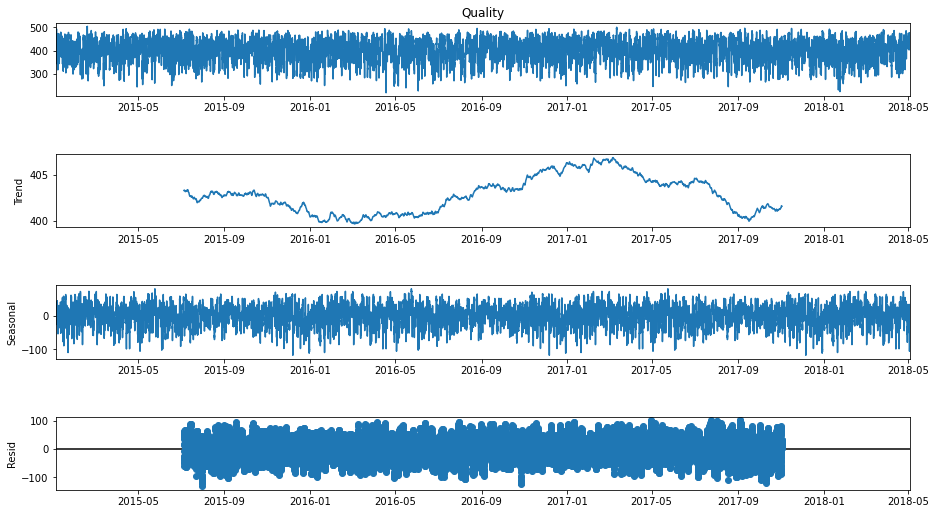

In [271]:
res = sm.tsa.seasonal_decompose(y_added.dropna(),freq=365*24) #сезонность если есть, то часовая?
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
plt.show()

In [107]:
!pip install -q tsfresh
from tsfresh import extract_features, extract_relevant_features, select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import ComprehensiveFCParameters
from tsfresh.utilities.dataframe_functions import roll_time_series, make_forecasting_frame

Закомментировал цикл создания признаков,их отбора и обучения модели, т.к. достаточно долго по времени выполняется код

In [239]:
# X_tsfresh = extract_features(df_train_y, 
#                      column_id="Timestamp", column_sort="Timestamp", column_value="Quality", 
#                      impute_function=impute, show_warnings=False)

Feature Extraction: 100%|██████████| 20/20 [02:40<00:00,  8.01s/it]


In [240]:
# X_tsfresh = X_tsfresh.reset_index(drop=True)
y_for_timeseries = df_train_y['Quality']

In [241]:
# X_tsfresh
#сгенерировано почти 800 признаков

Quality__variance_larger_than_standard_deviation  \
0                                                   0.0   
1                                                   0.0   
2                                                   0.0   
3                                                   0.0   
4                                                   0.0   
...                                                 ...   
29179                                               0.0   
29180                                               0.0   
29181                                               0.0   
29182                                               0.0   
29183                                               0.0   

       Quality__has_duplicate_max  Quality__has_duplicate_min  \
0                             0.0                         0.0   
1                             0.0                         0.0   
2                             0.0                         0.0   
3                             0.0                         0.0   
4                             0.0                         0.0   
...                           ...                         ...   
29179                         0.0                         0.0   
29180                         0.0                         0.0   
29181                         0.0                         0.0   
29182                         0.0                         0.0   
29183                         0.0                         0.0   

       Quality__has_duplicate  Quality__sum_values  Quality__abs_energy  \
0                         0.0                392.0             153664.0   
1                         0.0                384.0             147456.0   
2                         0.0                393.0             154449.0   
3                         0.0                399.0             159201.0   
4                         0.0                400.0             160000.0   
...                       ...                  ...                  ...   
29179                     0.0                438.0             191844.0   
29180                     0.0                452.0             204304.0   
29181                     0.0                455.0             207025.0   
29182                     0.0                455.0             207025.0   
29183                     0.0                454.0             206116.0   

       Quality__mean_abs_change  Quality__mean_change  \
0                           0.0                   0.0   
1                           0.0                   0.0   
2                           0.0                   0.0   
3                           0.0                   0.0   
4                           0.0                   0.0   
...                         ...                   ...   
29179                       0.0                   0.0   
29180                       0.0                   0.0   
29181                       0.0                   0.0   
29182                       0.0                   0.0   
29183                       0.0                   0.0   

       Quality__mean_second_derivative_central  Quality__median  \
0                                          0.0            392.0   
1                                          0.0            384.0   
2                                          0.0            393.0   
3                                          0.0            399.0   
4                                          0.0            400.0   
...                                        ...              ...   
29179                                      0.0            438.0   
29180                                      0.0            452.0   
29181                                      0.0            455.0   
29182                                      0.0            455.0   
29183                                      0.0            454.0   

       Quality__mean  Quality__length  Quality__standard_deviation  \
0              392.0              1.0                   

In [242]:
# selected_feats_tsfresh = select_features(X_tsfresh, y_for_timeseries)

In [243]:
# selected_feats_tsfresh
#отобрано 22 признака

Quality__sum_values  \
0                    392.0   
1                    384.0   
2                    393.0   
3                    399.0   
4                    400.0   
...                    ...   
29179                438.0   
29180                452.0   
29181                455.0   
29182                455.0   
29183                454.0   

       Quality__cwt_coefficients__coeff_0__w_20__widths_(2, 5, 10, 20)  \
0                                              76.024394                 
1                                              74.472876                 
2                                              76.218334                 
3                                              77.381973                 
4                                              77.575913                 
...                                                  ...                 
29179                                          84.945624                 
29180                                          87.660781                 
29181                                          88.242601                 
29182                                          88.242601                 
29183                                          88.048661                 

       Quality__cwt_coefficients__coeff_0__w_10__widths_(2, 5, 10, 20)  \
0                                             107.514730                 
1                                             105.320551                 
2                                             107.789002                 
3                                             109.434636                 
4                                             109.708908                 
...                                                  ...                 
29179                                         120.131254                 
29180                                         123.971066                 
29181                                         124.793883                 
29182                                         124.793883                 
29183                                         124.519610                 

       Quality__cwt_coefficients__coeff_0__w_5__widths_(2, 5, 10, 20)  \
0                                             152.048789                
1                                             148.945752                
2                                             152.436668                
3                                             154.763946                
4                                             155.151825                
...                                                  ...                
29179                                         169.891249                
29180                                         175.321563                
29181                                         176.485201                
29182                                         176.485201                
29183                                         176.097322                

       Quality__cwt_coefficients__coeff_0__w_2__widths_(2, 5, 10, 20)  \
0                                             240.410244                
1                                             235.503913                
2                                             241.023535                
3                                             244.703284                
4                                             245.316576                
...                                                  ...                
29179                                         268.621650                
29180                                         277.207730                
29181                                         279.047605                
29182                                         279.047605                
29183                                         278.434313                

       Quality__quantile__q_0.9  Quality__quantile__q_0.8  \
0                         392.0                     3

In [245]:
# X_train_tsfresh, X_test_tsfresh, y_train_tsfresh, y_test_tsfresh = train_test_split(selected_feats_tsfresh, y_for_timeseries, test_size=0.33, random_state=42)

In [246]:
# tsfresh_regressor = CatBoostRegressor()

In [247]:
# tsfresh_regressor.fit(X_train_tsfresh, y_train_tsfresh)

Learning rate set to 0.066258
0:	learn: 43.2969451	total: 5.03ms	remaining: 5.02s
1:	learn: 40.5767138	total: 9.69ms	remaining: 4.83s
2:	learn: 37.9960163	total: 14.2ms	remaining: 4.72s
3:	learn: 35.5852399	total: 18.6ms	remaining: 4.63s
4:	learn: 33.3474443	total: 23.1ms	remaining: 4.6s
5:	learn: 31.2744344	total: 27.9ms	remaining: 4.61s
6:	learn: 29.3080731	total: 32.6ms	remaining: 4.62s
7:	learn: 27.4704035	total: 37.2ms	remaining: 4.61s
8:	learn: 25.7654344	total: 41.6ms	remaining: 4.58s
9:	learn: 24.1505460	total: 46.1ms	remaining: 4.56s
10:	learn: 22.6472914	total: 50.6ms	remaining: 4.55s
11:	learn: 21.2325780	total: 55.4ms	remaining: 4.56s
12:	learn: 19.9105044	total: 61.2ms	remaining: 4.65s
13:	learn: 18.6667119	total: 65.9ms	remaining: 4.64s
14:	learn: 17.5035125	total: 71ms	remaining: 4.66s
15:	learn: 16.4186704	total: 75.5ms	remaining: 4.64s
16:	learn: 15.4039901	total: 79.7ms	remaining: 4.61s
17:	learn: 14.4494606	total: 83.9ms	remaining: 4.58s
18:	learn: 13.5656233	total: 

In [248]:
# tsfresh_preds = tsfresh_regressor.predict(X_test_tsfresh)

In [249]:
# mean_absolute_error(tsfresh_preds, y_test_tsfresh)

0.07482416598491717

Вообще говоря, стоило всегда проверять через кросс-валидацию временных рядов \
Но в конкретном случае такой подход и обычный train_test_split дают +- одинаковый результат

In [120]:
from sklearn.model_selection import TimeSeriesSplit

In [250]:
# tscv = TimeSeriesSplit(n_splits = 5)
# mae = []
# for train_index, test_index in tscv.split(selected_feats_tsfresh):
    
#     X_ts_train, X_ts_test = selected_feats_tsfresh.iloc[train_index], selected_feats_tsfresh.iloc[test_index]
#     y_ts_train, y_ts_test = y_for_timeseries.iloc[train_index], y_for_timeseries.iloc[test_index]
    
    
#     tsfresh_regressor.fit(X_ts_train, y_ts_train)
    
#     predictions = tsfresh_regressor.predict(X_ts_test)
#     true_values = y_ts_test.values
#     mae.append(mean_absolute_error(true_values, predictions))
    
# print("MAE: {}".format(np.mean(mae)))

Learning rate set to 0.051723
0:	learn: 43.3228862	total: 3.01ms	remaining: 3.01s
1:	learn: 41.2191185	total: 5.69ms	remaining: 2.84s
2:	learn: 39.1895319	total: 8.54ms	remaining: 2.84s
3:	learn: 37.3065934	total: 11.3ms	remaining: 2.81s
4:	learn: 35.4839444	total: 14ms	remaining: 2.78s
5:	learn: 33.7356600	total: 16.9ms	remaining: 2.8s
6:	learn: 32.1164783	total: 19.5ms	remaining: 2.76s
7:	learn: 30.5730585	total: 22.3ms	remaining: 2.76s
8:	learn: 29.0832962	total: 24.9ms	remaining: 2.74s
9:	learn: 27.6672311	total: 27.6ms	remaining: 2.73s
10:	learn: 26.3265639	total: 30.2ms	remaining: 2.71s
11:	learn: 25.0434150	total: 32.9ms	remaining: 2.71s
12:	learn: 23.8288586	total: 35.6ms	remaining: 2.7s
13:	learn: 22.6875749	total: 38.4ms	remaining: 2.7s
14:	learn: 21.6146544	total: 41.1ms	remaining: 2.7s
15:	learn: 20.5808384	total: 43.7ms	remaining: 2.69s
16:	learn: 19.5924997	total: 46.3ms	remaining: 2.67s
17:	learn: 18.6456864	total: 51ms	remaining: 2.78s
18:	learn: 17.7648325	total: 55.9m

#### Такая реализация дала наилучший результат -  MAE < 1, но подсчет всех статистик из пакета достаточно затратен с вычислительной точки зрения, и я не уверен, присутствует ли здесь все же "утечка данных", если модель использует такие признаки

Учитывая, что ARIMAX модель ошибается (по МАЕ) на 53, а catboost имеет ошибку < 10, и эквивалентен по входным данным, то я остановлю свой выбор на катбусте с лаговым значением.

In [123]:
df_dateonly = merged_added_df[['Hour','Year','Month','Day','dayofweek_num', 'Week', 'Quarter','Quality_t-1']]
y_date = y_for_timeseries[1:] #т.к. первое значение не имеет лагового

In [124]:
X_train_date, X_test_date, y_train_date, y_test_date = train_test_split(df_dateonly, y_date, test_size=0.33, random_state=42)

В сплите не было необходимости, потому что моя финальная идея для реализации такая:

Обучиться на полном обучающем наборе данных, сделать предсказание для следующей даты из сабмита, учитывая, что у нас всегда доступно лаговое (предыдущее) значение качества \
Затем обучиться на всем наборе данных ПЛЮС той строчке из сабмита, для которой мы сделали предсказание - и так для всего сабмита. \
Моя идея в том, чтобы модель могла использовать самый важный по feature_importance признак - лаговое значение.

In [125]:
date_regressor = CatBoostRegressor()

In [126]:
date_regressor.fit(df_dateonly,y_date)

Learning rate set to 0.071153
0:	learn: 43.3839705	total: 4.08ms	remaining: 4.08s
1:	learn: 40.7624428	total: 7.73ms	remaining: 3.85s
2:	learn: 38.3529094	total: 11.5ms	remaining: 3.81s
3:	learn: 36.0740738	total: 15.4ms	remaining: 3.85s
4:	learn: 33.9196422	total: 19.3ms	remaining: 3.84s
5:	learn: 31.9915767	total: 22.9ms	remaining: 3.79s
6:	learn: 30.1521721	total: 26.7ms	remaining: 3.79s
7:	learn: 28.5540666	total: 30.5ms	remaining: 3.79s
8:	learn: 27.0182725	total: 34.4ms	remaining: 3.79s
9:	learn: 25.6519948	total: 38.2ms	remaining: 3.78s
10:	learn: 24.3409359	total: 42.1ms	remaining: 3.79s
11:	learn: 23.2136436	total: 46ms	remaining: 3.79s
12:	learn: 22.1170017	total: 49.8ms	remaining: 3.78s
13:	learn: 21.1152464	total: 53.6ms	remaining: 3.77s
14:	learn: 20.2119441	total: 57.4ms	remaining: 3.77s
15:	learn: 19.4160244	total: 60.9ms	remaining: 3.74s
16:	learn: 18.6825189	total: 64.4ms	remaining: 3.72s
17:	learn: 18.0106223	total: 68.2ms	remaining: 3.72s
18:	learn: 17.4124078	total:

In [127]:
dat_pred = date_reg.predict(df_dateonly)

In [128]:
mean_absolute_error(dat_pred, y_d)

8.708939986829666

In [129]:
date_reg.get_feature_importance(prettified=True)

Feature Id  Importances
0    Quality_t-1    90.136319
1           Hour     2.975526
2            Day     2.329748
3           Week     1.785039
4  dayofweek_num     1.389593
5           Year     0.857626
6          Month     0.378262
7        Quarter     0.147888

Лаговое значение остается очень сильным признаков

Постепенно буду переходить к этапу предсказания значений, для этого выделю из даты аналогичные признаки, которые были использованы для обучения

In [130]:
y_submit['Timestamp'] = pd.to_datetime(y_submit['Timestamp'])
y_submit['Week'] = y_submit.Timestamp.dt.isocalendar().week.astype(float)
y_submit['Quarter'] = y_submit.Timestamp.dt.quarter.astype(float)
y_submit['Year'] = y_submit.Timestamp.dt.year
y_submit['Month'] = y_submit.Timestamp.dt.month
y_submit['Day'] = y_submit.Timestamp.dt.day
y_submit['dayofweek_num']=y_submit['Timestamp'].dt.dayofweek  
y_submit['Hour'] = y_submit.Timestamp.dt.hour
y_submit_proxy = y_submit

In [131]:
y_submit_proxy

Timestamp Quality  Week  Quarter  Year  Month  Day  \
0    2018-05-04 00:05:00     420  18.0      2.0  2018      5    4   
1    2018-05-04 01:05:00     420  18.0      2.0  2018      5    4   
2    2018-05-04 02:05:00     420  18.0      2.0  2018      5    4   
3    2018-05-04 03:05:00     420  18.0      2.0  2018      5    4   
4    2018-05-04 04:05:00     420  18.0      2.0  2018      5    4   
...                  ...     ...   ...      ...   ...    ...  ...   
5803 2018-12-31 19:05:00     420   1.0      4.0  2018     12   31   
5804 2018-12-31 20:05:00     420   1.0      4.0  2018     12   31   
5805 2018-12-31 21:05:00     420   1.0      4.0  2018     12   31   
5806 2018-12-31 22:05:00     420   1.0      4.0  2018     12   31   
5807 2018-12-31 23:05:00     420   1.0      4.0  2018     12   31   

      dayofweek_num  Hour  
0                 4     0  
1                 4     1  
2                 4     2  
3                 4     3  
4                 4     4  
...             ...   ...  
5803              0    19  
5804              0    20  
5805              0    21  
5806              0    22  
5807              0    23  

[5808 rows x 9 columns]

Посмотрев на дату начала из сабмита - можно предположить, что наблюдался трехдневный перерыв в майские праздники, поэтому я могу использовать последнее значение из обучающей признаки в кач-ве ответа на t-1 периоде

In [132]:
y_submit_proxy['Quality_t-1'] = None
y_submit_proxy['Quality_t-1'][0] = df_train_y.Quality[-1:].values[0]

C:\Users\wanna\AppData\Local\Temp/ipykernel_1576/3252682103.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_submit_proxy['Quality_t-1'][0] = df_train_y.Quality[-1:].values[0]


In [133]:
y_submit_proxy = y_submit_proxy.drop(['Quality', 'Timestamp'], axis = 1)

In [134]:
y_submit_proxy['Quality'] = None
y_submit_proxy

Week  Quarter  Year  Month  Day  dayofweek_num  Hour Quality_t-1 Quality
0     18.0      2.0  2018      5    4              4     0       454.0    None
1     18.0      2.0  2018      5    4              4     1        None    None
2     18.0      2.0  2018      5    4              4     2        None    None
3     18.0      2.0  2018      5    4              4     3        None    None
4     18.0      2.0  2018      5    4              4     4        None    None
...    ...      ...   ...    ...  ...            ...   ...         ...     ...
5803   1.0      4.0  2018     12   31              0    19        None    None
5804   1.0      4.0  2018     12   31              0    20        None    None
5805   1.0      4.0  2018     12   31              0    21        None    None
5806   1.0      4.0  2018     12   31              0    22        None    None
5807   1.0      4.0  2018     12   31              0    23        None    None

[5808 rows x 9 columns]

#### Пример того, что я хочу сделать:

In [137]:
y_submit_proxy['Quality'][0] = round(date_reg.predict(testing)[0])
y_submit_proxy

C:\Users\wanna\AppData\Local\Temp/ipykernel_1576/1269395803.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_submit_proxy['Quality'][0] = round(date_reg.predict(testing)[0])


Week  Quarter  Year  Month  Day  dayofweek_num  Hour Quality_t-1 Quality
0     18.0      2.0  2018      5    4              4     0       454.0     452
1     18.0      2.0  2018      5    4              4     1        None    None
2     18.0      2.0  2018      5    4              4     2        None    None
3     18.0      2.0  2018      5    4              4     3        None    None
4     18.0      2.0  2018      5    4              4     4        None    None
...    ...      ...   ...    ...  ...            ...   ...         ...     ...
5803   1.0      4.0  2018     12   31              0    19        None    None
5804   1.0      4.0  2018     12   31              0    20        None    None
5805   1.0      4.0  2018     12   31              0    21        None    None
5806   1.0      4.0  2018     12   31              0    22        None    None
5807   1.0      4.0  2018     12   31              0    23        None    None

[5808 rows x 9 columns]

In [138]:
#создам датасет из трейна + сабмита
full_proxy_df = df_dateonly
full_proxy_df = full_proxy_df.append(y_submit_proxy)
# full_proxy_df = full_proxy_df.drop(['Timestamp', 'Quality'], axis = 1)
full_proxy_df = full_proxy_df.reset_index(drop=True)

In [154]:
y_date.mean(), y_date.std()

(402.8007469846491, 46.27322776260594)

In [155]:
y_proxy = y_date.to_numpy() #промежуточная переменная для хранения ответов модели

## Код ниже выполняется очень долго - здесь модель обучается много раз, поэтому закомментировал

In [156]:
# for i in range(len(yy),len(full_proxy_df)):
#     full_proxy_df['Quality_t-1'][i] = full_proxy_df['Quality'][i-1]
#     date_reg.fit(super_proxy.iloc[:i], y_proxy, verbose = False)
#     full_proxy_df['Quality'][i] = date_reg.predict(full_proxy_df.iloc[i])
#     y_proxy = np.append(y_proxy, round(date_reg.predict(full_proxy_df.iloc[i])))

C:\Users\wanna\AppData\Local\Temp/ipykernel_1576/2730007601.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super_proxy['Quality_t-1'][i] = super_proxy['Quality'][i-1]
C:\Users\wanna\AppData\Local\Temp/ipykernel_1576/2730007601.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super_proxy['Quality'][i] = date_reg.predict(super_proxy.iloc[i])


In [183]:
#подготавливаю полученные результаты к сабмиту
proxy_for_submit = full_proxy_df[-len(y_submit):]
proxy_for_submit = proxy_for_submit.reset_index(drop=True)
proxy_for_submit.Quality = round(proxy_for_submit.Quality.astype(float)).astype(int)
proxy_for_submit['Timestamp'] = y_submit['Timestamp']
proxy_for_submit

Hour  Year  Month  Day  dayofweek_num  Week  Quarter Quality_t-1  \
0        0  2018      5    4              4  18.0      2.0       454.0   
1        1  2018      5    4              4  18.0      2.0         452   
2        2  2018      5    4              4  18.0      2.0  451.888802   
3        3  2018      5    4              4  18.0      2.0  452.004461   
4        4  2018      5    4              4  18.0      2.0  451.962454   
...    ...   ...    ...  ...            ...   ...      ...         ...   
5803    19  2018     12   31              0   1.0      4.0  451.512396   
5804    20  2018     12   31              0   1.0      4.0  451.371583   
5805    21  2018     12   31              0   1.0      4.0  451.380112   
5806    22  2018     12   31              0   1.0      4.0  451.428559   
5807    23  2018     12   31              0   1.0      4.0  451.311726   

         Quality  
0            452  
1     451.888802  
2     452.004461  
3     451.962454  
4     451.973777  
...          ...  
5803  451.371583  
5804  451.380112  
5805  451.428559  
5806  451.311726  
5807  451.452664  

[5808 rows x 9 columns]

In [186]:
proxy_for_submit.Quality.std()

2.262933928040947

Получился очень маленький разброс значений - модель предсказывает почти что константу, что не очень хорошо - и более того, не совсем для меня понятно.

In [189]:
proxy_for_submit=proxy_for_submit[['Timestamp', 'Quality']]

In [210]:
#в оригинальном сабмите формат строковый у обоих значений + нет названий колонок
proxy_for_submit = proxy_for_submit.astype(str)
proxy_for_submit.columns = proxy_for_submit.iloc[0]
proxy_for_submit = proxy_for_submit[1:]
proxy_for_submit

0     2018-05-04 00:05:00  452
1     2018-05-04 01:05:00  452
2     2018-05-04 02:05:00  452
3     2018-05-04 03:05:00  452
4     2018-05-04 04:05:00  452
5     2018-05-04 05:05:00  451
...                   ...  ...
5803  2018-12-31 19:05:00  451
5804  2018-12-31 20:05:00  451
5805  2018-12-31 21:05:00  451
5806  2018-12-31 22:05:00  451
5807  2018-12-31 23:05:00  451

[5807 rows x 2 columns]

In [215]:
#сохранение файла в формате для сабмита
proxy_for_submit.to_csv('sevstal_submit.csv', index = False, sep =';')

### Интересно посмотреть бейзлайн от fbprophet

In [272]:
from prophet import Prophet

In [274]:
y_added #ответы для обучающей выборки

Timestamp
2015-01-04 01:00:00    384.0
2015-01-04 02:00:00    393.0
2015-01-04 03:00:00    399.0
2015-01-04 04:00:00    400.0
2015-01-04 05:00:00    417.0
                       ...  
2018-05-03 19:00:00    438.0
2018-05-03 20:00:00    452.0
2018-05-03 21:00:00    455.0
2018-05-03 22:00:00    455.0
2018-05-03 23:00:00    454.0
Name: Quality, Length: 29183, dtype: float64

In [275]:
prophet_df_tr = df_train_y[['Timestamp', 'Quality']][:24183]
prophet_df_tes = df_train_y[['Timestamp', 'Quality']][:-5000]

prophet_df_tr = prophet_df_tr.rename({'Timestamp' : 'ds', 'Quality': 'y'}, axis = 1)
prophet_df_tes = prophet_df_tes.rename({'Timestamp' : 'ds', 'Quality': 'y'}, axis = 1)

In [276]:
model = Prophet() #instantiate Prophet with only yearly seasonality as our data is monthly 
model.fit(prophet_df_tr)

In [277]:
future = model.make_future_dataframe(periods=5000)
future.tail()

ds
29178 2031-06-12 14:05:00
29179 2031-06-13 14:05:00
29180 2031-06-14 14:05:00
29181 2031-06-15 14:05:00
29182 2031-06-16 14:05:00

In [278]:
forecast = model.predict(future)

In [279]:
abs(forecast['yhat']-prophet_df_tes['y']).mean()

37.32696431337712

Пока кажется, что и fbprophet будет предсказывать чуть хуже, чем catboost с t-1 значением

Очень маленькая дисперсия в предсказании каждого последующего значения меня смущает - скорее всего, качество будет не сильно хорошим из-за этого. Возможно, что даже хуже в итоге, чем обычной ARIMA \
Я никак не "реализовал" сведения с датчиков о температуре для предсказания значений качества - только лаговое значение и дату, поскольку не представляю, как их можно использовать, имея только дату.  

Думал о том, что можно попробовать предсказать каждое значение датчика той же ARIMA, но тогда возникает мысль о том, что значения качества будут иметь слишком сильное смещение, если каждое предсказание датчика будет иметь хотя бы такое же значение ошибки МАЕ, что и Quality - это будут просто предсказания для несуществующей комбинации показателей датчиков. 

В любом случае, буду рад обратной связи по поводу проделанной работы.